### All clones in baseline vs longitudinal visits

In [1]:
library(data.table)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

In [24]:
## corrected lipid phenotype
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.Jun3May2023.csv", 
                             header=T)
names(aric_baseline_n_v05)
nrow(aric_baseline_n_v05)
ncol(aric_baseline_n_v05)

names(aric_baseline_n_v05[,c(1:18,41:125)])
ncol(aric_baseline_n_v05[,c(1:18,41:125)])

[1] "GWAS_ID"                "ARIC_ID"                "GWASID_Visit"          
  [4] "cram_id"                "Visit.x"                "Gender"                
  [7] "Age"                    "CH_baseline"            "CH_v05"                
 [10] "incident_CH"            "incident_CHvaf05"       "incident_CHvaf10"      
 [13] "incident_DNMT3A"        "incident_TET2"          "incident_ASXL1"        
 [16] "incident_DTA"           "incident_SF"            "incident_DDR"          
 [19] "sex_v5"                 "race_v5"                "center_v5"             
 [22] "dob_v5"                 "date_v5"                "age_v5"                
 [25] "fast_8_v5"              "bmi_v5"                 "dm_126_v5"             
 [28] "gluc_v5"                "htn_5_v5"               "chol_v5"               
 [31] "hdl_v5"                 "ldl_v5"                 "tg_v5"                 
 [34] "chol_med_v5"            "statin_v5"              "cig_v5"                
 [37] "chd_v5"                 "is_v5"                  "hs_v5"                 
 [40] "hf_v5"                  "death.x"                "death_date.x"          
 [43] "bmi_v5_std"             "gluc_v5_std"            "chol_v5_std"           
 [46] "hdl_v5_std"             "ldl_v5_std"             "tg_v5_std"             
 [49] "non_hdl_v5_std"         "hg38_CRAM_ID"           "aricid"                
 [52] "Visit.y"                "sex"                    "race"                  
 [55] "center"                 "dob"                    "date_base"             
 [58] "age_base"               "fast_8_base"            "bmi_base"              
 [61] "dm_126_base"            "gluc_base"              "htn_5_base"            
 [64] "chol_med_base"          "statin_base"            "cig_base"              
 [67] "chd_date"               "is_date"                "hs_date"               
 [70] "hf_date"                "death.y"                "death_date.y"          
 [73] "lfu_date"               "chd_base"               "is_base"               
 [76] "hs_base"                "hf_base"                "ever_smoke"            
 [79] "v2_vs_other"            "Sex"                    "race_BW"               
 [82] "BMI_cat"                "nonHDL_std"             "hdl_base_std"          
 [85] "ldl_base_std"           "chol_base_std"          "tg_base_std"           
 [88] "gluc_base_std"          "bmi_base_std"           "CHvaf10_baseline"      
 [91] "CH_baseline_v05"        "CHvaf10_baseline_v05"   "CH_DTA"                
 [94] "CH_SF"                  "CH_DDR"                 "CH_DNMT3A"             
 [97] "CH_TET2"                "CH_ASXL1"               "nonHDL_base_std"       
[100] "age_base_sqr"           "Center"                 "sbp_base"              
[103] "dbp_base"               "hem_can_base"           "hem_can_inc_base"      
[106] "hem_can_int_base"       "hem_can_inc_v5"         "hem_can_int_v5"        
[109] "chol_base"              "hdl_base"               "ldl_base"              
[112] "tg_base"                "chd_is_base"            "chol_base_INT"         
[115] "ldl_base_INT"           "hdl_base_INT"           "tg_base_INT"           
[118] "nonHDL_base"            "nonHDL_base_INT"        "bmi_base_INT"          
[121] "tg_to_hdl_base"         "tg_to_hdl_base_INT"     "ldl_base_nomal_vs_high"
[124] "hdl_base_low"           "Dyslipidemia"

[1] 4187

[1] 125

[1] "GWAS_ID"                "ARIC_ID"                "GWASID_Visit"          
  [4] "cram_id"                "Visit.x"                "Gender"                
  [7] "Age"                    "CH_baseline"            "CH_v05"                
 [10] "incident_CH"            "incident_CHvaf05"       "incident_CHvaf10"      
 [13] "incident_DNMT3A"        "incident_TET2"          "incident_ASXL1"        
 [16] "incident_DTA"           "incident_SF"            "incident_DDR"          
 [19] "death.x"                "death_date.x"           "bmi_v5_std"            
 [22] "gluc_v5_std"            "chol_v5_std"            "hdl_v5_std"            
 [25] "ldl_v5_std"             "tg_v5_std"              "non_hdl_v5_std"        
 [28] "hg38_CRAM_ID"           "aricid"                 "Visit.y"               
 [31] "sex"                    "race"                   "center"                
 [34] "dob"                    "date_base"              "age_base"              
 [37] "fast_8_base"            "bmi_base"               "dm_126_base"           
 [40] "gluc_base"              "htn_5_base"             "chol_med_base"         
 [43] "statin_base"            "cig_base"               "chd_date"              
 [46] "is_date"                "hs_date"                "hf_date"               
 [49] "death.y"                "death_date.y"           "lfu_date"              
 [52] "chd_base"               "is_base"                "hs_base"               
 [55] "hf_base"                "ever_smoke"             "v2_vs_other"           
 [58] "Sex"                    "race_BW"                "BMI_cat"               
 [61] "nonHDL_std"             "hdl_base_std"           "ldl_base_std"          
 [64] "chol_base_std"          "tg_base_std"            "gluc_base_std"         
 [67] "bmi_base_std"           "CHvaf10_baseline"       "CH_baseline_v05"       
 [70] "CHvaf10_baseline_v05"   "CH_DTA"                 "CH_SF"                 
 [73] "CH_DDR"                 "CH_DNMT3A"              "CH_TET2"               
 [76] "CH_ASXL1"               "nonHDL_base_std"        "age_base_sqr"          
 [79] "Center"                 "sbp_base"               "dbp_base"              
 [82] "hem_can_base"           "hem_can_inc_base"       "hem_can_int_base"      
 [85] "hem_can_inc_v5"         "hem_can_int_v5"         "chol_base"             
 [88] "hdl_base"               "ldl_base"               "tg_base"               
 [91] "chd_is_base"            "chol_base_INT"          "ldl_base_INT"          
 [94] "hdl_base_INT"           "tg_base_INT"            "nonHDL_base"           
 [97] "nonHDL_base_INT"        "bmi_base_INT"           "tg_to_hdl_base"        
[100] "tg_to_hdl_base_INT"     "ldl_base_nomal_vs_high" "hdl_base_low"          
[103] "Dyslipidemia"

[1] 103

In [13]:
    # pheno base/longit
    # N = 4,189
# aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", header=T)

    # qcd CH variants with phenotypes
ch_var_in_baseline_qcd.pheno <- fread("ch_var_in_baseline_qcd_pheno.23Mar2023.csv", header = T)

ch_var_in_v05_qcd.pheno <- fread("ch_var_in_v05_qcd_pheno.23Mar2023.csv", header = T)

    # pre-qc CH variants 
ch_var_in_baseline <- fread("../Returned_CH_call/baseline_CH_variants_in_aric_hiseq_novaseq_samevisit.maxDP_noDup.plusPileup.2023Jan30.csv", header = T)

ch_var_in_v05 <- fread("../Returned_CH_call/ch_var_in_v05.plusPileup.2023Jan30.csv", header = T)

    # CHIP w/o Heme CA
# aric_baseline_n_v05_noPrevHeme <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", header=T)
# names(aric_baseline_n_v05_noPrevHeme)


In [14]:
### Corrected Lipid values
## corrected lipid values
lipids_base <- fread("aric_baseline_vanilla_02082023.csv", header=T, sep="\t")

lipids_v5 <- fread("aric_longitudinal_vanilla_02082023.csv", header=T, sep="\t")

head(lipids_base)
nrow(lipids_v5)
names(lipids_v5)
which(grepl(pattern = "_v5", x = names(lipids_v5)))
names(lipids_v5)[grepl(pattern = "_v5", x = names(lipids_v5))]

gwasid,hg38_CRAM_ID,aricid,Visit,sex_base,race_base,center_base,dob_base,date_base,age_base,...,is_date,hs_date,hf_date,death,death_date,lfu_date,chd_base,is_base,hs_base,hf_base
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<int>,...,<date>,<date>,<date>,<int>,<date>,<date>,<int>,<int>,<int>,<int>
A03873,10047,J136997,V01,F,B,J,1939-01-25,1987-06-29,48,...,2014-11-07,2014-11-07,2014-11-07,1,2014-11-07,2014-11-07,0,0,0,0
A11144,10382,J211628,V01,F,B,J,1934-09-01,1988-07-25,53,...,2017-12-31,2017-12-31,2017-12-31,0,NA,2017-12-31,0,0,0,0
A01476,10566,J201860,V01,F,B,J,1932-04-18,1988-06-13,56,...,2001-06-16,2017-01-11,2010-02-26,1,2017-01-11,2017-01-11,0,0,0,0
A02423,10665,J207189,V01,F,B,J,1925-05-30,1988-07-01,63,...,2017-12-31,2017-12-31,2017-12-31,0,NA,2017-12-31,0,0,0,0
A12200,1106,J146117,V01,F,B,J,1929-03-11,1987-08-15,58,...,2009-09-25,2017-12-31,2017-12-31,0,NA,2017-12-31,0,0,0,0
A01593,1144,J144450,V01,M,B,J,1935-09-14,1987-08-04,51,...,2017-12-31,2017-12-31,2017-12-31,0,NA,2017-12-31,0,0,0,0


[1] 15792

[1] "aricid"        "sex_v1"        "race_v1"       "center_v1"    
  [5] "dob_v1"        "date_v1"       "age_v1"        "fast_8_v1"    
  [9] "bmi_v1"        "dm_126_v1"     "gluc_v1"       "htn_5_v1"     
 [13] "chol_v1"       "hdl_v1"        "ldl_v1"        "tg_v1"        
 [17] "chol_med_v1"   "statin_v1"     "cig_v1"        "sex_v2"       
 [21] "race_v2"       "center_v2"     "dob_v2"        "date_v2"      
 [25] "age_v2"        "fast_8_v2"     "bmi_v2"        "dm_126_v2"    
 [29] "gluc_v2"       "htn_5_v2"      "chol_v2"       "hdl_v2"       
 [33] "ldl_v2"        "tg_v2"         "chol_med_v2"   "statin_v2"    
 [37] "cig_v2"        "sex_v3"        "race_v3"       "center_v3"    
 [41] "dob_v3"        "date_v3"       "age_v3"        "fast_8_v3"    
 [45] "bmi_v3"        "dm_126_v3"     "htn_5_v3"      "chol_v3"      
 [49] "hdl_v3"        "ldl_v3"        "tg_v3"         "chol_med_v3"  
 [53] "statin_v3"     "cig_v3"        "gluc_v3"       "sex_v4"       
 [57] "race_v4"       "center_v4"     "dob_v4"        "date_v4"      
 [61] "age_v4"        "fast_8_v4"     "bmi_v4"        "dm_126_v4"    
 [65] "gluc_v4"       "htn_5_v4"      "chol_v4"       "hdl_v4"       
 [69] "ldl_v4"        "tg_v4"         "chol_med_v4"   "statin_v4"    
 [73] "cig_v4"        "sex_vmri"      "race_vmri"     "center_vmri"  
 [77] "dob_vmri"      "date_vmri"     "age_vmri"      "fast_8_vmri"  
 [81] "bmi_vmri"      "dm_126_vmri"   "gluc_vmri"     "htn_5_vmri"   
 [85] "chol_vmri"     "hdl_vmri"      "ldl_vmri"      "tg_vmri"      
 [89] "chol_med_vmri" "statin_vmri"   "cig_vmri"      "sex_v5"       
 [93] "race_v5"       "center_v5"     "dob_v5"        "date_v5"      
 [97] "age_v5"        "fast_8_v5"     "bmi_v5"        "dm_126_v5"    
[101] "gluc_v5"       "htn_5_v5"      "chol_v5"       "hdl_v5"       
[105] "ldl_v5"        "tg_v5"         "chol_med_v5"   "statin_v5"    
[109] "cig_v5"        "chd_v1"        "chd_v2"        "chd_v3"       
[113] "chd_v4"        "chd_vmri"      "chd_v5"        "is_v1"        
[117] "is_v2"         "is_v3"         "is_v4"         "is_vmri"      
[121] "is_v5"         "hs_v1"         "hs_v2"         "hs_v3"        
[125] "hs_v4"         "hs_vmri"       "hs_v5"         "hf_v1"        
[129] "hf_v2"         "hf_v3"         "hf_v4"         "hf_vmri"      
[133] "hf_v5"         "chd_date"      "is_date"       "hs_date"      
[137] "hf_date"       "death"         "death_date"    "lfu_date"

[1]  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 115
[20] 121 127 133

[1] "sex_v5"      "race_v5"     "center_v5"   "dob_v5"      "date_v5"    
 [6] "age_v5"      "fast_8_v5"   "bmi_v5"      "dm_126_v5"   "gluc_v5"    
[11] "htn_5_v5"    "chol_v5"     "hdl_v5"      "ldl_v5"      "tg_v5"      
[16] "chol_med_v5" "statin_v5"   "cig_v5"      "chd_v5"      "is_v5"      
[21] "hs_v5"       "hf_v5"

In [16]:
## Update lipid values in mg/dl
# aric_baseline_n_v05 <- merge(aric_baseline_n_v05_noPrevHeme[, c(1:63,68:112)], 
  #                                      lipids_base[, c(1,16:19)], 
   #                                     by.x="GWAS_ID", 
    #                                    by.y = "gwasid")
# nrow(aric_baseline_n_v05)
# ncol(aric_baseline_n_v05)
# names(aric_baseline_n_v05)

In [21]:

names(aric_baseline_n_v05)
names(aric_baseline_n_v05)[grepl(pattern = "_v5", x = names(aric_baseline_n_v05))]


[1] "GWAS_ID"                "ARIC_ID"                "GWASID_Visit"          
  [4] "cram_id"                "Visit.x"                "Gender"                
  [7] "Age"                    "CH_baseline"            "CH_v05"                
 [10] "incident_CH"            "incident_CHvaf05"       "incident_CHvaf10"      
 [13] "incident_DNMT3A"        "incident_TET2"          "incident_ASXL1"        
 [16] "incident_DTA"           "incident_SF"            "incident_DDR"          
 [19] "sex_v5"                 "race_v5"                "center_v5"             
 [22] "dob_v5"                 "date_v5"                "age_v5"                
 [25] "fast_8_v5"              "bmi_v5"                 "dm_126_v5"             
 [28] "gluc_v5"                "htn_5_v5"               "chol_v5"               
 [31] "hdl_v5"                 "ldl_v5"                 "tg_v5"                 
 [34] "chol_med_v5"            "statin_v5"              "cig_v5"                
 [37] "chd_v5"                 "is_v5"                  "hs_v5"                 
 [40] "hf_v5"                  "death.x"                "death_date.x"          
 [43] "bmi_v5_std"             "gluc_v5_std"            "chol_v5_std"           
 [46] "hdl_v5_std"             "ldl_v5_std"             "tg_v5_std"             
 [49] "non_hdl_v5_std"         "hg38_CRAM_ID"           "aricid"                
 [52] "Visit.y"                "sex"                    "race"                  
 [55] "center"                 "dob"                    "date_base"             
 [58] "age_base"               "fast_8_base"            "bmi_base"              
 [61] "dm_126_base"            "gluc_base"              "htn_5_base"            
 [64] "chol_med_base"          "statin_base"            "cig_base"              
 [67] "chd_date"               "is_date"                "hs_date"               
 [70] "hf_date"                "death.y"                "death_date.y"          
 [73] "lfu_date"               "chd_base"               "is_base"               
 [76] "hs_base"                "hf_base"                "ever_smoke"            
 [79] "v2_vs_other"            "Sex"                    "race_BW"               
 [82] "BMI_cat"                "nonHDL_std"             "hdl_base_std"          
 [85] "ldl_base_std"           "chol_base_std"          "tg_base_std"           
 [88] "gluc_base_std"          "bmi_base_std"           "CHvaf10_baseline"      
 [91] "CH_baseline_v05"        "CHvaf10_baseline_v05"   "CH_DTA"                
 [94] "CH_SF"                  "CH_DDR"                 "CH_DNMT3A"             
 [97] "CH_TET2"                "CH_ASXL1"               "nonHDL_base_std"       
[100] "age_base_sqr"           "Center"                 "sbp_base"              
[103] "dbp_base"               "hem_can_base"           "hem_can_inc_base"      
[106] "hem_can_int_base"       "hem_can_inc_v5"         "hem_can_int_v5"        
[109] "chol_base"              "hdl_base"               "ldl_base"              
[112] "tg_base"                "chd_is_base"            "chol_base_INT"         
[115] "ldl_base_INT"           "hdl_base_INT"           "tg_base_INT"           
[118] "nonHDL_base"            "nonHDL_base_INT"        "bmi_base_INT"          
[121] "tg_to_hdl_base"         "tg_to_hdl_base_INT"     "ldl_base_nomal_vs_high"
[124] "hdl_base_low"           "Dyslipidemia"

[1] "sex_v5"         "race_v5"        "center_v5"      "dob_v5"        
 [5] "date_v5"        "age_v5"         "fast_8_v5"      "bmi_v5"        
 [9] "dm_126_v5"      "gluc_v5"        "htn_5_v5"       "chol_v5"       
[13] "hdl_v5"         "ldl_v5"         "tg_v5"          "chol_med_v5"   
[17] "statin_v5"      "cig_v5"         "chd_v5"         "is_v5"         
[21] "hs_v5"          "hf_v5"          "bmi_v5_std"     "gluc_v5_std"   
[25] "chol_v5_std"    "hdl_v5_std"     "ldl_v5_std"     "tg_v5_std"     
[29] "non_hdl_v5_std" "hem_can_inc_v5" "hem_can_int_v5"

In [27]:
## Corrected Visit 5 lipid values
aric_baseline_n_v05.v2 <- merge (aric_baseline_n_v05[,c(1:18,41,42,50:125)], 
                                 lipids_v5[,c(1, 92:109, 115, 121, 127, 133)], 
                                 by.x="ARIC_ID", by.y="aricid") 
names(aric_baseline_n_v05.v2)
str(aric_baseline_n_v05.v2)

[1] "ARIC_ID"                "GWAS_ID"                "GWASID_Visit"          
  [4] "cram_id"                "Visit.x"                "Gender"                
  [7] "Age"                    "CH_baseline"            "CH_v05"                
 [10] "incident_CH"            "incident_CHvaf05"       "incident_CHvaf10"      
 [13] "incident_DNMT3A"        "incident_TET2"          "incident_ASXL1"        
 [16] "incident_DTA"           "incident_SF"            "incident_DDR"          
 [19] "death.x"                "death_date.x"           "hg38_CRAM_ID"          
 [22] "aricid"                 "Visit.y"                "sex"                   
 [25] "race"                   "center"                 "dob"                   
 [28] "date_base"              "age_base"               "fast_8_base"           
 [31] "bmi_base"               "dm_126_base"            "gluc_base"             
 [34] "htn_5_base"             "chol_med_base"          "statin_base"           
 [37] "cig_base"               "chd_date"               "is_date"               
 [40] "hs_date"                "hf_date"                "death.y"               
 [43] "death_date.y"           "lfu_date"               "chd_base"              
 [46] "is_base"                "hs_base"                "hf_base"               
 [49] "ever_smoke"             "v2_vs_other"            "Sex"                   
 [52] "race_BW"                "BMI_cat"                "nonHDL_std"            
 [55] "hdl_base_std"           "ldl_base_std"           "chol_base_std"         
 [58] "tg_base_std"            "gluc_base_std"          "bmi_base_std"          
 [61] "CHvaf10_baseline"       "CH_baseline_v05"        "CHvaf10_baseline_v05"  
 [64] "CH_DTA"                 "CH_SF"                  "CH_DDR"                
 [67] "CH_DNMT3A"              "CH_TET2"                "CH_ASXL1"              
 [70] "nonHDL_base_std"        "age_base_sqr"           "Center"                
 [73] "sbp_base"               "dbp_base"               "hem_can_base"          
 [76] "hem_can_inc_base"       "hem_can_int_base"       "hem_can_inc_v5"        
 [79] "hem_can_int_v5"         "chol_base"              "hdl_base"              
 [82] "ldl_base"               "tg_base"                "chd_is_base"           
 [85] "chol_base_INT"          "ldl_base_INT"           "hdl_base_INT"          
 [88] "tg_base_INT"            "nonHDL_base"            "nonHDL_base_INT"       
 [91] "bmi_base_INT"           "tg_to_hdl_base"         "tg_to_hdl_base_INT"    
 [94] "ldl_base_nomal_vs_high" "hdl_base_low"           "Dyslipidemia"          
 [97] "sex_v5"                 "race_v5"                "center_v5"             
[100] "dob_v5"                 "date_v5"                "age_v5"                
[103] "fast_8_v5"              "bmi_v5"                 "dm_126_v5"             
[106] "gluc_v5"                "htn_5_v5"               "chol_v5"               
[109] "hdl_v5"                 "ldl_v5"                 "tg_v5"                 
[112] "chol_med_v5"            "statin_v5"              "cig_v5"                
[115] "chd_v5"                 "is_v5"                  "hs_v5"                 
[118] "hf_v5"

Classes 'data.table' and 'data.frame':	4187 obs. of  118 variables:
 $ ARIC_ID               : chr  "F100601" "F100785" "F100920" "F101063" ...
 $ GWAS_ID               : chr  "A09377" "A07720" "A14695" "A14432" ...
 $ GWASID_Visit          : chr  "A09377_V05" "A07720_V05" "A14695_V05" "A14432_V05" ...
 $ cram_id               : chr  "HW2Y3DSX2-3-IDUDI0054" "HYV73DSXY-3-IDUDI0054" "HY2KGDSX2-2-IDUDI0058" "HW2Y3DSX2-3-IDUDI0046" ...
 $ Visit.x               : chr  "V05" "V05" "V05" "V05" ...
 $ Gender                : chr  "F" "F" "F" "M" ...
 $ Age                   : int  83 75 83 81 83 76 76 70 87 82 ...
 $ CH_baseline           : int  0 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05                : int  1 0 1 1 1 0 0 1 0 0 ...
 $ incident_CH           : int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf05      : int  1 0 1 NA 1 0 0 1 0 0 ...
 $ incident_CHvaf10      : int  1 0 1 NA NA 0 0 NA 0 0 ...
 $ incident_DNMT3A       : int  1 0 1 NA 0 0 0 1 0 0 ...
 $ incident_TET2         : int  0 0 0 NA 0 0

In [28]:
summary(aric_baseline_n_v05.v2)

   ARIC_ID            GWAS_ID          GWASID_Visit         cram_id         
 Length:4187        Length:4187        Length:4187        Length:4187       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Visit.x             Gender               Age         CH_baseline    
 Length:4187        Length:4187        Min.   :67.00   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:71.00   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :75.00   Median :0.0000  
                                       Mean   :75.78   Mean   :0.1091  
                        

In [29]:
# fwrite(aric_baseline_n_v05.v2, 
  #     "aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids_base_n_v5.20Nov2023.csv", 
   #    row.names = F, col.names = T, sep=",", na = "NA")

In [4]:
#####################
## Expanded/shrinked CH
#####################
## 
  ## All CH Variant observed in Visit 05 
expansion.CH_v_b_v5_all <- merge(ch_var_in_v05_qcd.pheno, 
                                 ch_var_in_baseline[,c(10:15,22,24,25)], 
                                 by="varID_GWASID", 
                                 all.x=T)
## var.x="longitudianl"
## var.y="baseline"
nrow(expansion.CH_v_b_v5_all)
summary(expansion.CH_v_b_v5_all$VAF.x)
summary(expansion.CH_v_b_v5_all$VAF.y)


[1] 1302

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0560  0.0895  0.1318  0.1770  0.7500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.007   0.044   0.077   0.112   0.131   0.563     950 

In [5]:
# Add 0.0001 [ranges:0-1] where VAF is missing i.e. VAF = 0.01% [0-100%]
expansion.CH_v_b_v5_all$VAF.y[is.na(expansion.CH_v_b_v5_all$VAF.y)] <- 0.0001
summary(expansion.CH_v_b_v5_all$VAF.y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03036 0.02000 0.56300 

In [6]:
######
### Only observed in Baseline samples [missing in qcd V05]
######
expansion.CH_baseAll_n_V05 <- merge(ch_var_in_baseline_qcd.pheno, 
                                 ch_var_in_v05[,c(10:15,23,24)], 
                                 by="varID_GWASID", 
                                 all.x=T)
## var.x="baseline" 
## var.y="longitudianl"
nrow(expansion.CH_baseAll_n_V05)
summary(expansion.CH_baseAll_n_V05$VAF.x)
summary(expansion.CH_baseAll_n_V05$VAF.y)

[1] 576

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0500  0.0730  0.1006  0.1170  0.5630 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0100  0.0830  0.1720  0.1932  0.2710  0.5700     269 

In [7]:
# Add 0.0001 where VAF is missing
expansion.CH_baseAll_n_V05$VAF.y[is.na(expansion.CH_baseAll_n_V05$VAF.y)] <- 0.0001
summary(expansion.CH_baseAll_n_V05$VAF.y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0001  0.0001  0.0430  0.1030  0.1847  0.5700 

In [8]:
table(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID)


FALSE  TRUE 
  277   299 

In [9]:
# Exclude 299 variants overlapping with V05
expansion.CH_baseAll_n_V05 <- subset(expansion.CH_baseAll_n_V05, !(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID) )
nrow(expansion.CH_baseAll_n_V05)
table(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID)

[1] 277


FALSE 
  277 

In [10]:
summary(expansion.CH_v_b_v5_all$VAF.x)
summary(expansion.CH_v_b_v5_all$VAF.y)
cat("Base\n")
summary(expansion.CH_baseAll_n_V05$VAF.x)
summary(expansion.CH_baseAll_n_V05$VAF.y)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0560  0.0895  0.1318  0.1770  0.7500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03036 0.02000 0.56300 

Base


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02000 0.04200 0.06200 0.07159 0.08900 0.35600 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001000 0.0001000 0.0001000 0.0008913 0.0001000 0.0410000 

In [44]:
## Manually append two files
# fwrite(expansion.CH_v_b_v5_all, "expansion.CH_v_b_v5_all.23Mar2023.csv", 
 #       row.names = F, col.names = T, sep=",", na = "NA")

#  fwrite(expansion.CH_baseAll_n_V05, "expansion.CH_baseAll_n_V05.23Mar2023.csv",
 #       row.names = F, col.names = T, sep=",", na = "NA")

In [11]:
## Combined ch var file
com.expansion.CH_v_b_v5_all  <- fread("combined.expansion.CH_v_b_v5_all.23Mar2023.csv", header=T) 
#names(expansion.CH_baseAll_n_V05)

In [12]:
 str(com.expansion.CH_v_b_v5_all)

Classes 'data.table' and 'data.frame':	1579 obs. of  125 variables:
 $ varID_GWASID        : chr  "chr10_87931087_GAGGT_G_A07861" "chr10_87933249_AAGGTAAGTTATTTTTTGATGTT_A_A06550" "chr10_87960969_G_T_A04739" "chr11_119278221_G_A_A14253" ...
 $ GWAS_ID             : chr  "A07861" "A06550" "A04739" "A14253" ...
 $ CHR                 : chr  "chr10" "chr10" "chr10" "chr11" ...
 $ POS                 : int  87931087 87933249 87960969 119278221 119278257 119278263 119278269 119278274 119278281 119278289 ...
 $ REF                 : chr  "GAGGT" "AAGGTAAGTTATTTTTTGATGTT" "G" "G" ...
 $ ALT                 : chr  "G" "A" "T" "A" ...
 $ Gene                : chr  "PTEN" "PTEN" "PTEN" "CBL" ...
 $ AD.v5               : chr  "63,50" "77,3" "142,6" "136,5" ...
 $ VAF.v5              : num  0.449 0.044 0.037 0.045 0.367 0.297 0.071 0.071 0.077 0.086 ...
 $ DP.v5               : int  113 80 148 141 69 126 100 110 110 103 ...
 $ AD.Alt.v5           : int  50 3 6 5 23 34 5 6 9 7 ...
 $ FR.Alt.v5     

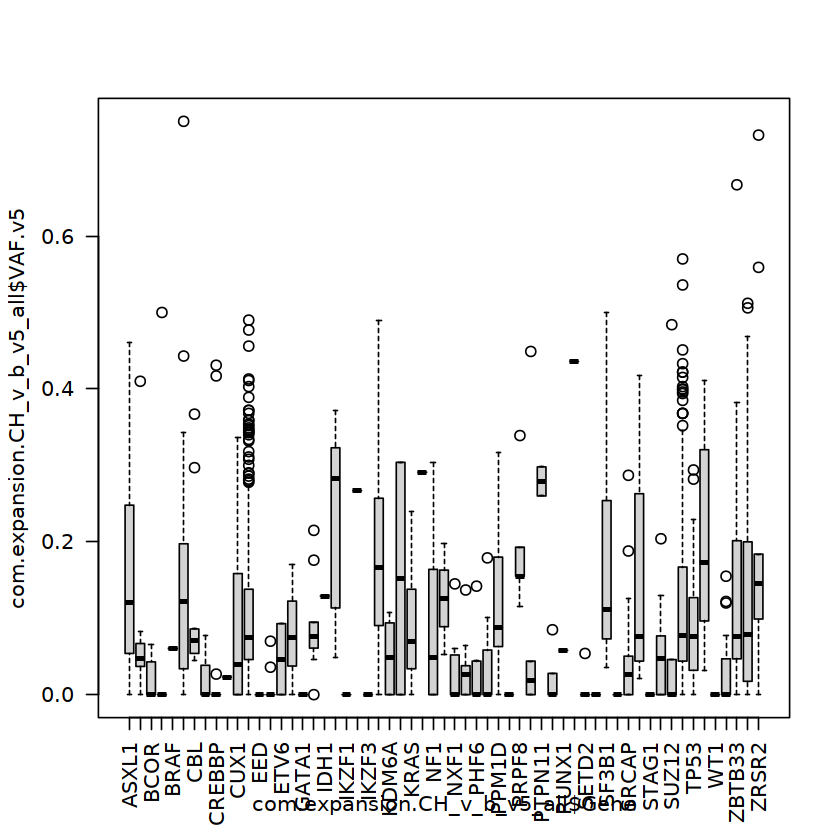

In [14]:
boxplot(com.expansion.CH_v_b_v5_all$VAF.v5 ~ com.expansion.CH_v_b_v5_all$Gene, las=2)

In [15]:
sort(table(com.expansion.CH_v_b_v5_all$Gene), decreasing = T)


 DNMT3A    TET2   ASXL1   PPM1D   SF3B1    TP53  ZNF318   SRSF2   YLPM1   STAG2 
    594     306     103      42      42      37      32      29      29      28 
 ZBTB33   SRCAP   PDS5B    JAK2  CREBBP    PHIP   BRCC3     NF1   U2AF1     CBL 
     28      23      21      19      16      16      15      12      12      10 
  EP300    GNB1   KDM6A    NXF1   ZRSR2   SETD2   ASXL2    CUX1    IDH2    PHF6 
     10      10       9       9       9       8       7       7       7       7 
   PTEN   RAD21   STAG1    BCOR  BCORL1    KRAS   PRPF8   SUZ12    CBLB    NRAS 
      6       6       6       5       5       5       5       5       4       4 
 SETDB1    SMC3    EZH2    BRAF    ETV6     KIT  PTPN11    CTCF     EED   GATA1 
      4       4       3       2       2       2       2       1       1       1 
   IDH1   IKZF1   IKZF2   IKZF3     MPL PRPF40B   RUNX1  SETBP1     WT1 
      1       1       1       1       1       1       1       1       1 

In [16]:
sort(table(com.expansion.CH_v_b_v5_all$NonsynOI), decreasing = T)


             nan            R882H       G646Wfs*12            V617F 
             151               27               20               19 
                             P95H            K700E            R882C 
              18               17               16               14 
          I1873T            R771X             P95L       E635Rfs*15 
              12               11               10                9 
            K57E            R552X            E342X            Q157P 
               9                9                8                8 
           R320X            R326C            R736H            W313X 
               8                8                8                7 
           K666N            R140Q            R326H            Y591X 
               6                6                6                6 
          E1033X             G12D            R635W            V657M 
               5                5                5                5 
           W330X            Y660C

In [17]:
# FU time
com.expansion.CH_v_b_v5_all$dAge <- com.expansion.CH_v_b_v5_all$Age - com.expansion.CH_v_b_v5_all$age_base
summary(com.expansion.CH_v_b_v5_all$dAge)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   20.00   21.00   20.33   21.00   27.00 

In [18]:
com.expansion.CH_v_b_v5_all$dVAF <- com.expansion.CH_v_b_v5_all$VAF.v5 - com.expansion.CH_v_b_v5_all$VAF.v2
summary(com.expansion.CH_v_b_v5_all$dVAF)
## change from "1"
com.expansion.CH_v_b_v5_all$pctVAF <- (com.expansion.CH_v_b_v5_all$VAF.v5/com.expansion.CH_v_b_v5_all$VAF.v2 -1)
summary(com.expansion.CH_v_b_v5_all$pctVAF)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.35590  0.02090  0.06090  0.07124  0.11645  0.74990 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -1.000    0.244  439.000  672.829  909.000 7499.000 

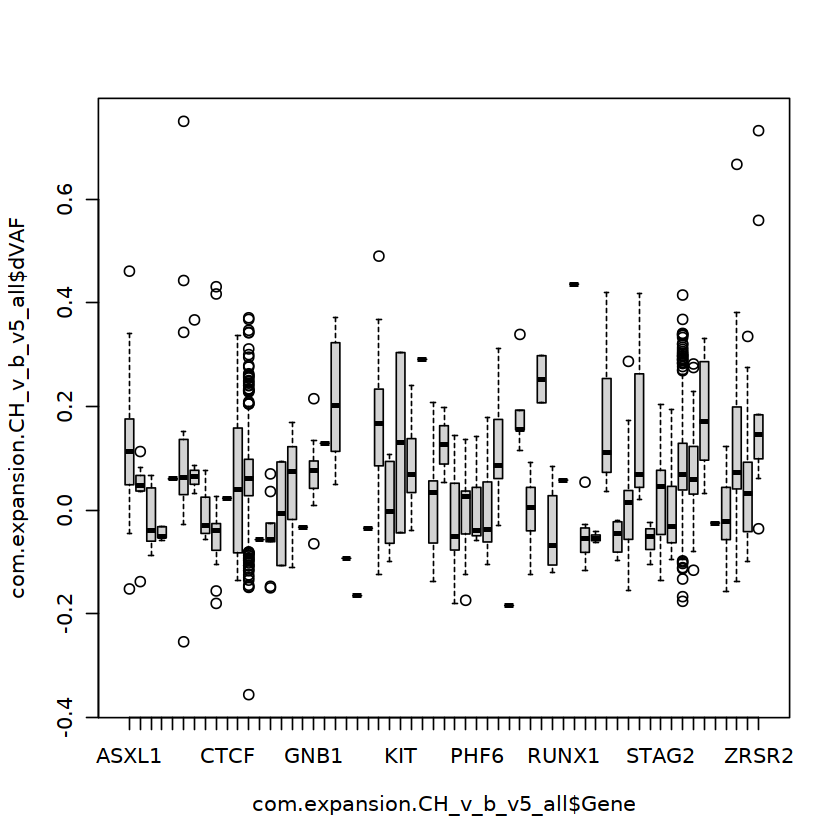

In [19]:
boxplot(com.expansion.CH_v_b_v5_all$dVAF ~ com.expansion.CH_v_b_v5_all$Gene)

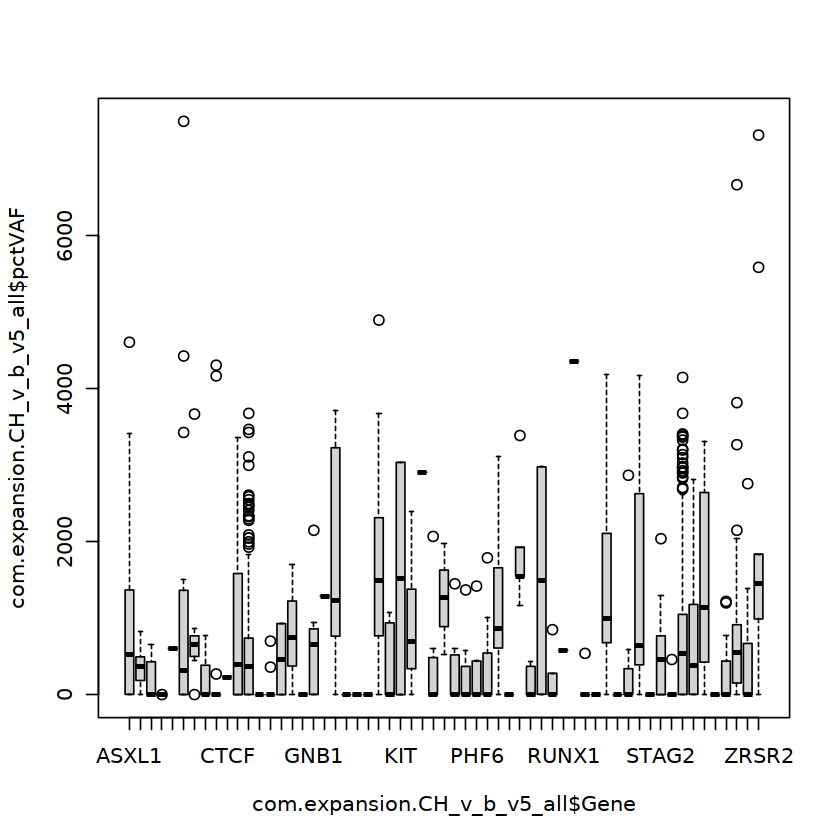

In [20]:
boxplot(com.expansion.CH_v_b_v5_all$pctVAF ~ com.expansion.CH_v_b_v5_all$Gene)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0223167  0.0009762  0.0029500  0.0035806  0.0057650  0.1071286 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2001  0.0108  0.2900  0.1519  0.3368  1.2747 

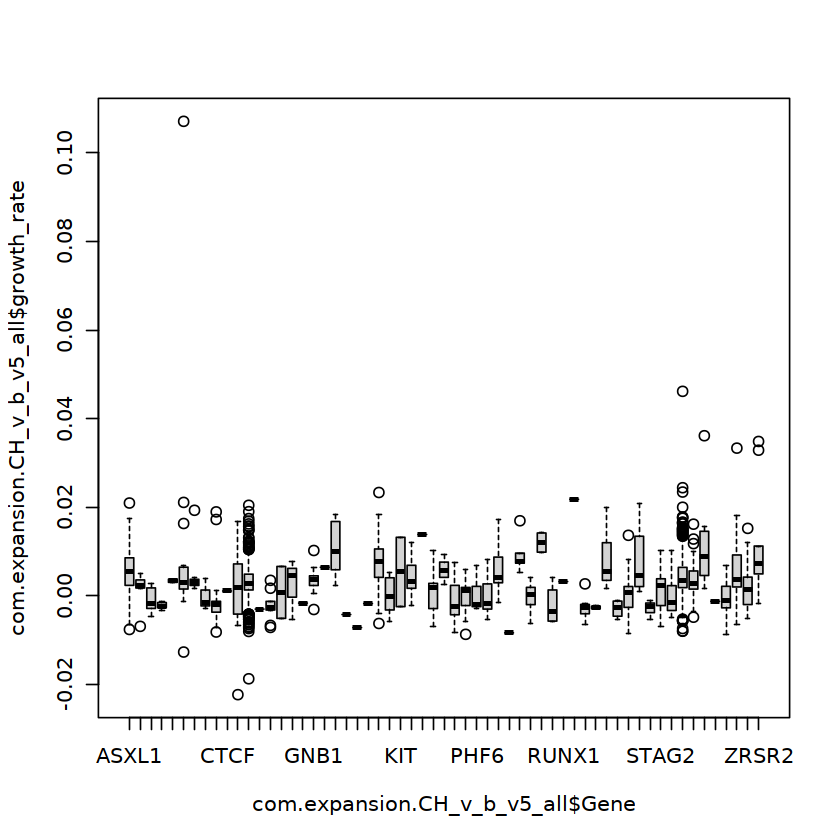

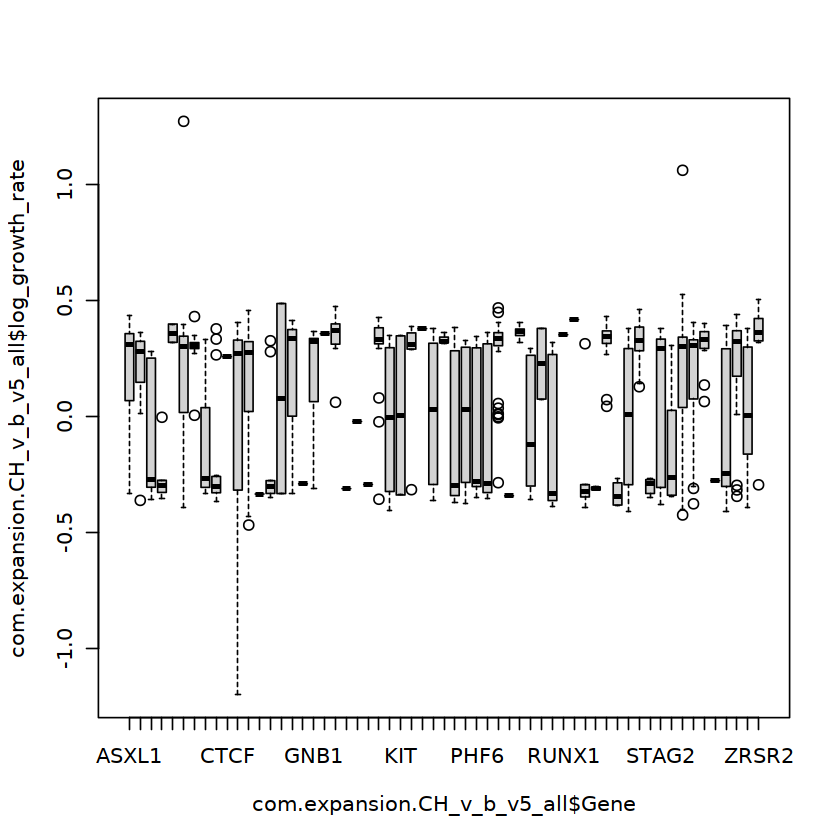

In [21]:
# dvaf
com.expansion.CH_v_b_v5_all$growth_rate <- (com.expansion.CH_v_b_v5_all$dVAF/com.expansion.CH_v_b_v5_all$dAge)

com.expansion.CH_v_b_v5_all$log_growth_rate <- (log(com.expansion.CH_v_b_v5_all$VAF.v5/com.expansion.CH_v_b_v5_all$VAF.v2)/com.expansion.CH_v_b_v5_all$dAge)

summary(com.expansion.CH_v_b_v5_all$growth_rate)

summary(com.expansion.CH_v_b_v5_all$log_growth_rate)

boxplot(com.expansion.CH_v_b_v5_all$growth_rate ~ com.expansion.CH_v_b_v5_all$Gene)

boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate ~ com.expansion.CH_v_b_v5_all$Gene)

In [56]:
summary(com.expansion.CH_v_b_v5_all$VAF.v5>0.0001)
summary(com.expansion.CH_v_b_v5_all$VAF.v2>0.0001)

   Mode   FALSE    TRUE 
logical     269    1310 

   Mode   FALSE    TRUE 
logical     950     629 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.8732  0.1321  0.2851  0.3063  0.4895  2.0439 

[1] 0.3063223

[1] 0.4086281


Call:
lm(formula = com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene == 
    "DNMT3A"] * 100 ~ 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1795 -0.1742 -0.0212  0.1832  1.7376 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30632    0.01677   18.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4086 on 593 degrees of freedom


,2.5 %,97.5 %
(Intercept),0.273394,0.3392507


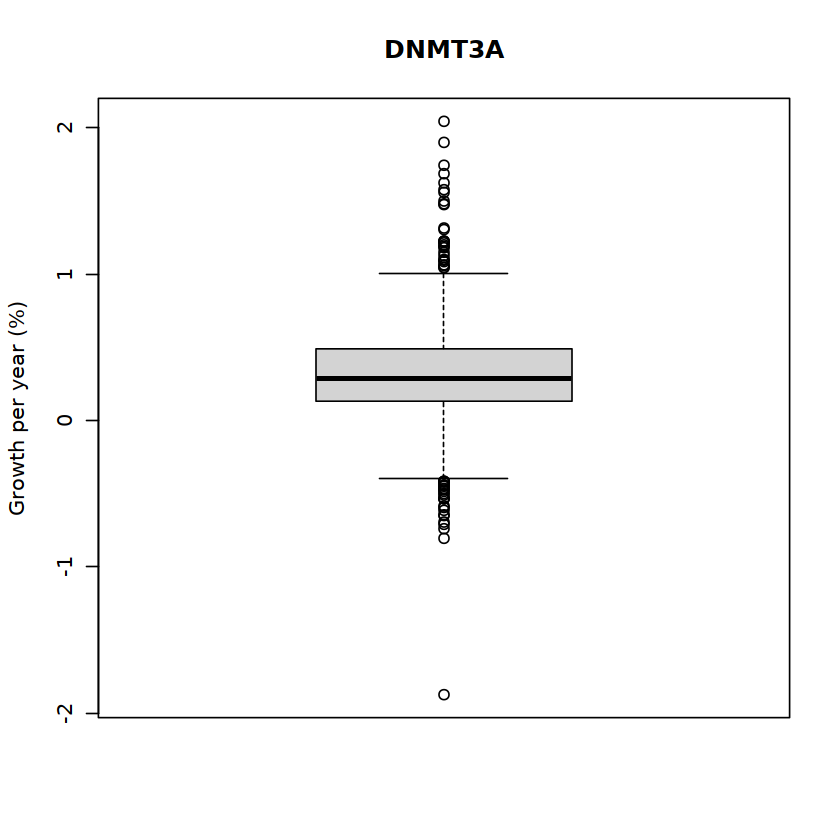

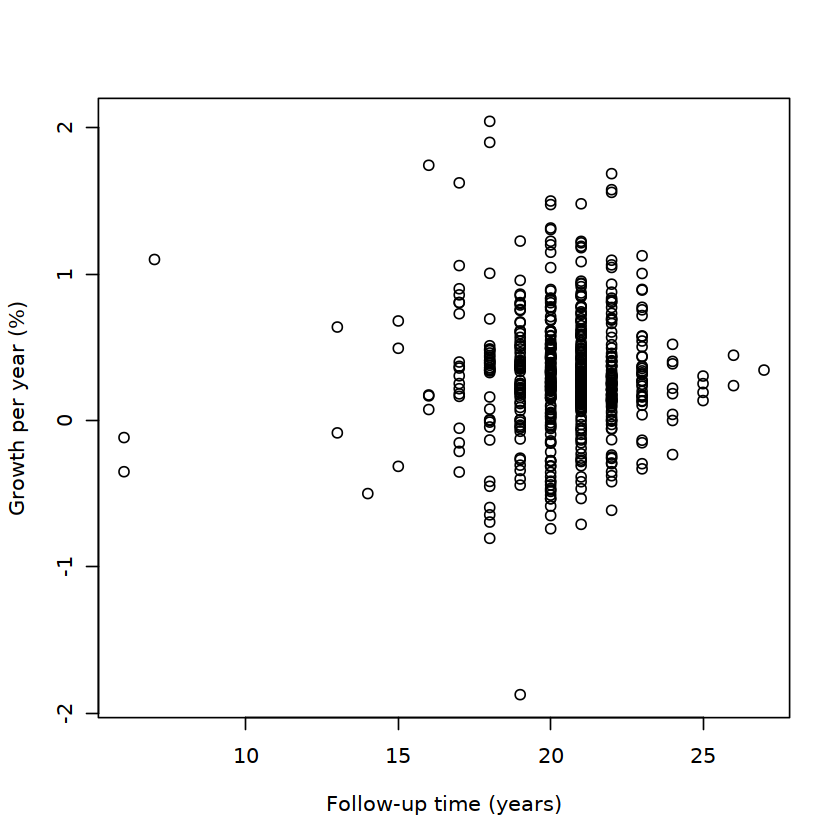

In [36]:
## DNMT3A
summary(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100)
mean(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100)
sd(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100)
summary(lm(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100 ~ 1))
confint(lm(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100 ~ 1), 
        level=0.95)
boxplot(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100, 
        ylab="Growth per year (%)", main="DNMT3A")
plot(com.expansion.CH_v_b_v5_all$dAge[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"], 
     com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="DNMT3A"]*100, 
     xlab="Follow-up time (years)", ylab="Growth per year (%)")




In [44]:
summary(com.expansion.CH_v_b_v5_all[com.expansion.CH_v_b_v5_all$Gene=="SRSF2",])

 varID_GWASID         GWAS_ID              CHR                 POS          
 Length:29          Length:29          Length:29          Min.   :76736877  
 Class :character   Class :character   Class :character   1st Qu.:76736877  
 Mode  :character   Mode  :character   Mode  :character   Median :76736877  
                                                          Mean   :76736882  
                                                          3rd Qu.:76736877  
                                                          Max.   :76737031  
                                                                            
     REF                ALT                Gene              AD.v5          
 Length:29          Length:29          Length:29          Length:29         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4667  0.5214  0.5762  0.5762  0.6310  0.6857 

[1] 0.5761905

[1] 0.1548901


Call:
lm(formula = com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene == 
    "SRSF2" & com.expansion.CH_v_b_v5_all$VAF.v5 > 1e-04 & com.expansion.CH_v_b_v5_all$VAF.v2 > 
    1e-04] * 100 ~ 1)

Residuals:
      1       2 
 0.1095 -0.1095 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.5762     0.1095   5.261     0.12

Residual standard error: 0.1549 on 1 degrees of freedom


,2.5 %,97.5 %
(Intercept),-0.8154415,1.967822


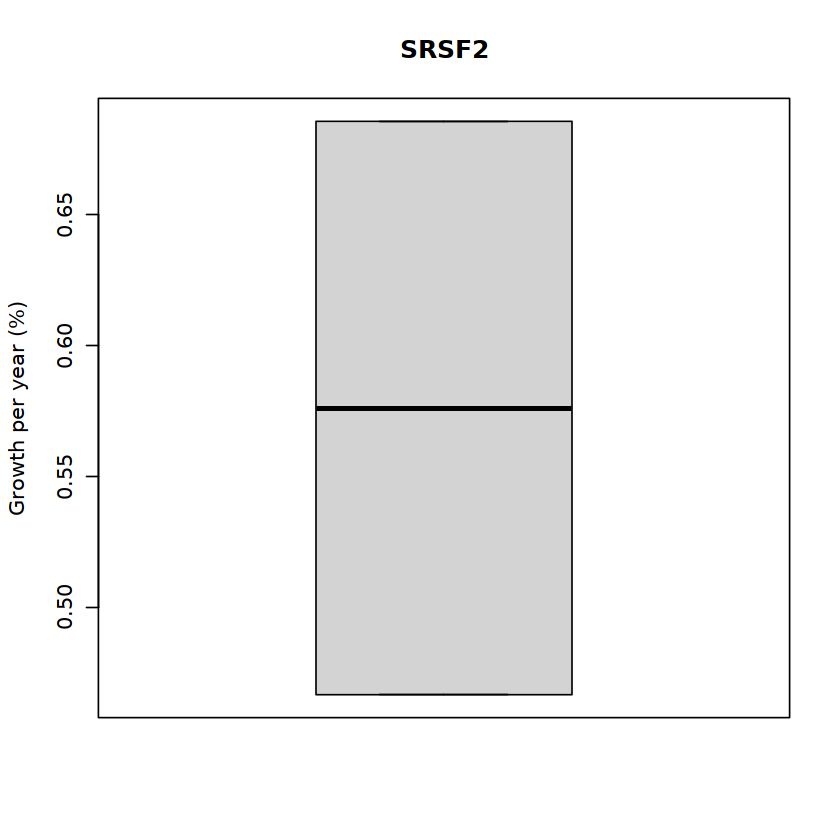

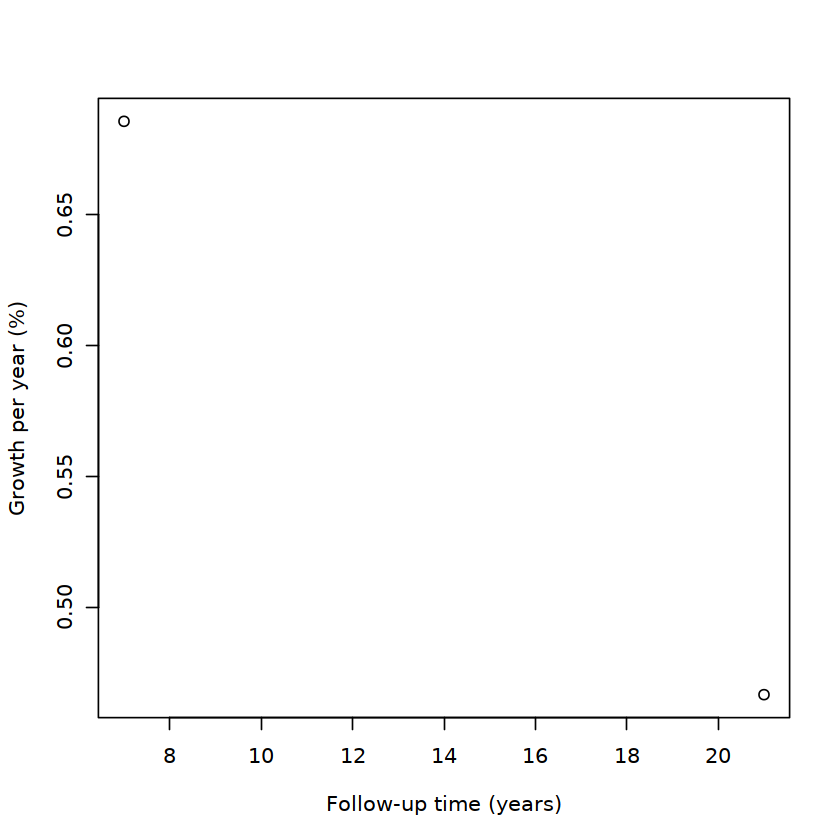

In [54]:
## SRSF2
summary(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100)
mean(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100)
sd(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100)

summary(lm(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100 ~ 1))

confint(lm(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100 ~ 1), 
        level=0.95)

boxplot(com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100, 
        ylab="Growth per year (%)", main="SRSF2")

plot(com.expansion.CH_v_b_v5_all$dAge[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001], 
     com.expansion.CH_v_b_v5_all$growth_rate[com.expansion.CH_v_b_v5_all$Gene=="SRSF2" & 
                                                com.expansion.CH_v_b_v5_all$VAF.v5>0.0001 & 
                                                com.expansion.CH_v_b_v5_all$VAF.v2>0.0001]*100, 
     xlab="Follow-up time (years)", ylab="Growth per year (%)")

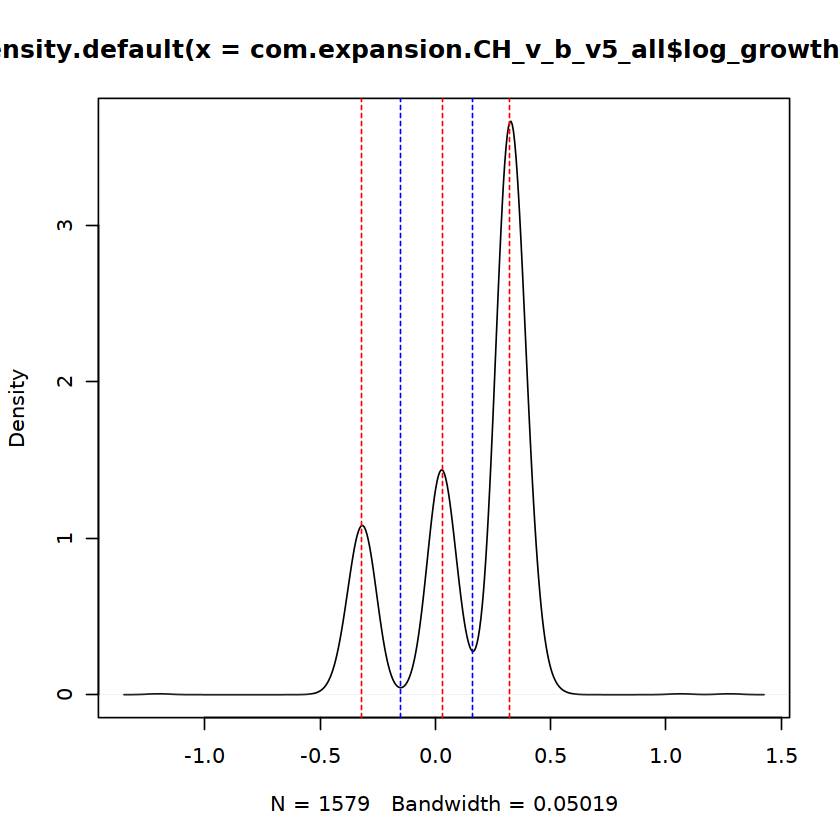

In [59]:
plot(density(com.expansion.CH_v_b_v5_all$log_growth_rate))
abline(v = c(-0.32,0.029,0.32), col = "red", lty = 2)
#abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)
abline(v = c(-0.15,0.16), col = "blue", lty = 2)

In [60]:
# Estimate the density of the data
my_dens <- density(com.expansion.CH_v_b_v5_all$log_growth_rate)

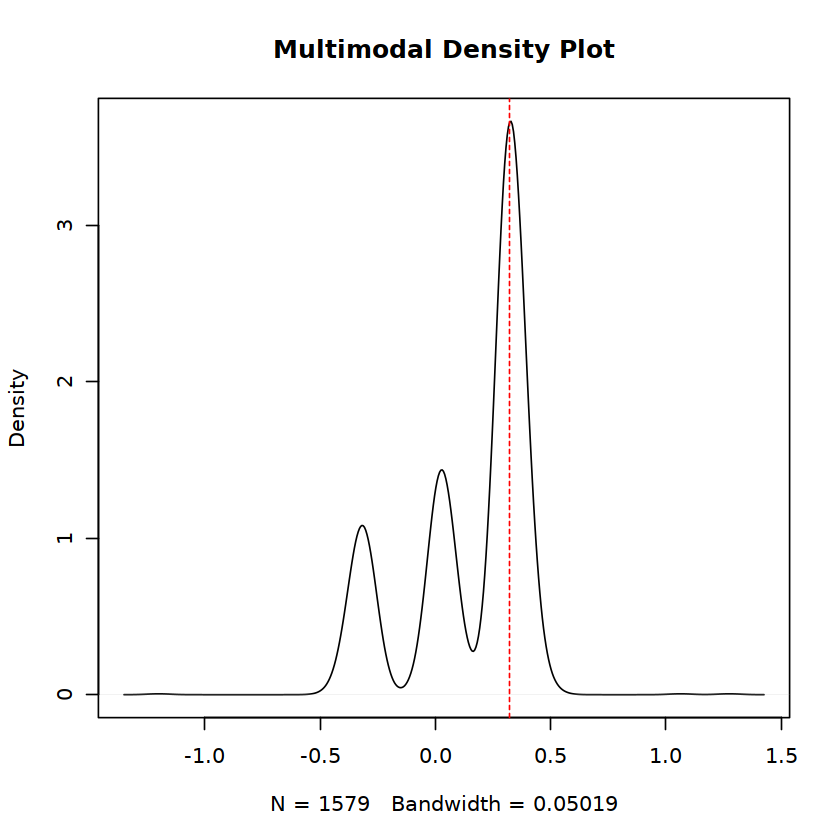

In [61]:
# Identify the maximum point(s) of the density function
max_idx <- which(my_dens$y == max(my_dens$y))
modes <- my_dens$x[findInterval(max_idx, c(1:length(my_dens$x) + 0.5))] 

# Plot the density function with the mode(s) marked
plot(my_dens, main = "Multimodal Density Plot")
abline(v = modes, col = "red", lty = 2)

In [62]:
## Mixtures of multiple distribution 
library(mixtools)
# Fit a Gaussian mixture model with three components
fit_k3 <- normalmixEM(com.expansion.CH_v_b_v5_all$log_growth_rate, k = 3)

mixtools package, version 1.2.0, Released 2020-02-05
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




number of iterations= 32 


In [63]:
fit_k3_fixd <- normalmixEM(com.expansion.CH_v_b_v5_all$log_growth_rate, k=3, mean.constr = c(-0.32,0.029,0.32), 
                    sd.constr = c(0.036, 0.037, 0.043))

number of iterations= 3 


In [64]:
summary(fit_k3_fixd)

summary of normalmixEM object:
          comp 1   comp 2   comp 3
lambda  0.170361 0.226317 0.603322
mu     -0.320000 0.029000 0.320000
sigma   0.036000 0.037000 0.043000
loglik at estimate:  584.1762 


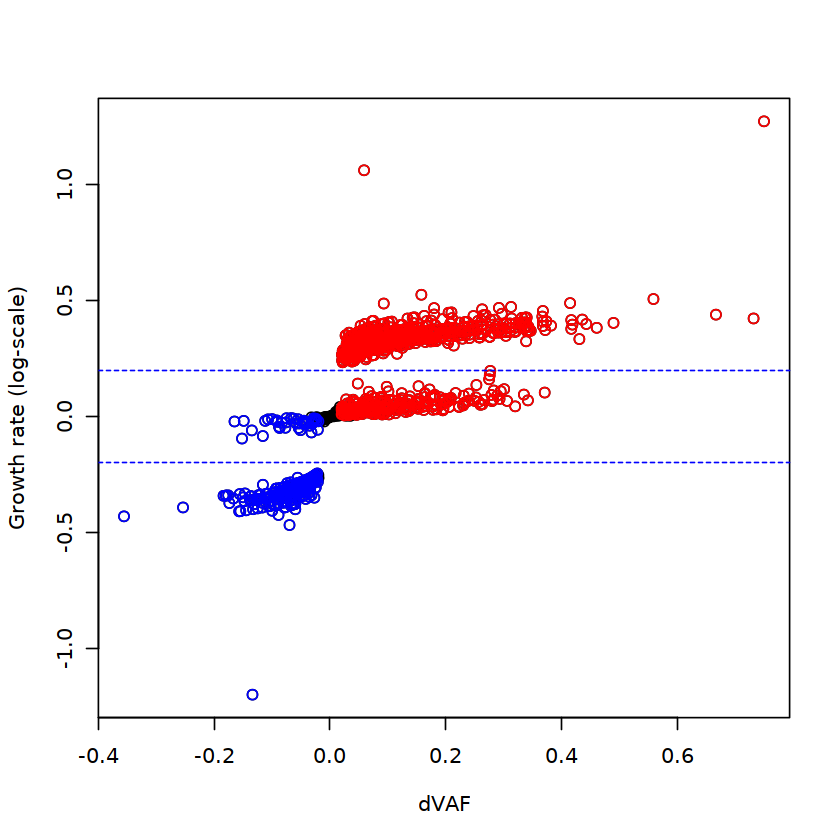

In [65]:
plot(x=com.expansion.CH_v_b_v5_all$dVAF, y=com.expansion.CH_v_b_v5_all$log_growth_rate,   
     xlab = "dVAF", ylab = "Growth rate (log-scale)")
points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02], col="red")
points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], col="blue")

abline(h = c(-0.2,0.2), col = "blue", lty = 2)

##### three distinct groups
*Explanation:* 
Top cluster: CH detected in visit 05, not detected in baseline. imputed clones at base with vaf = .0001

middle cluster: detected in both visits

Bottom cluster: only detected in baseline visit

In [66]:
cat("Growing clones\n")
table(com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02)

cat("shrinking clones\n")
table(com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02)

cat("static clones\n")
table( !((com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02) |
     (com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02)) )


Growing clones



FALSE  TRUE 
  393  1186 

shrinking clones



FALSE  TRUE 
 1271   308 

static clones



FALSE  TRUE 
 1494    85 

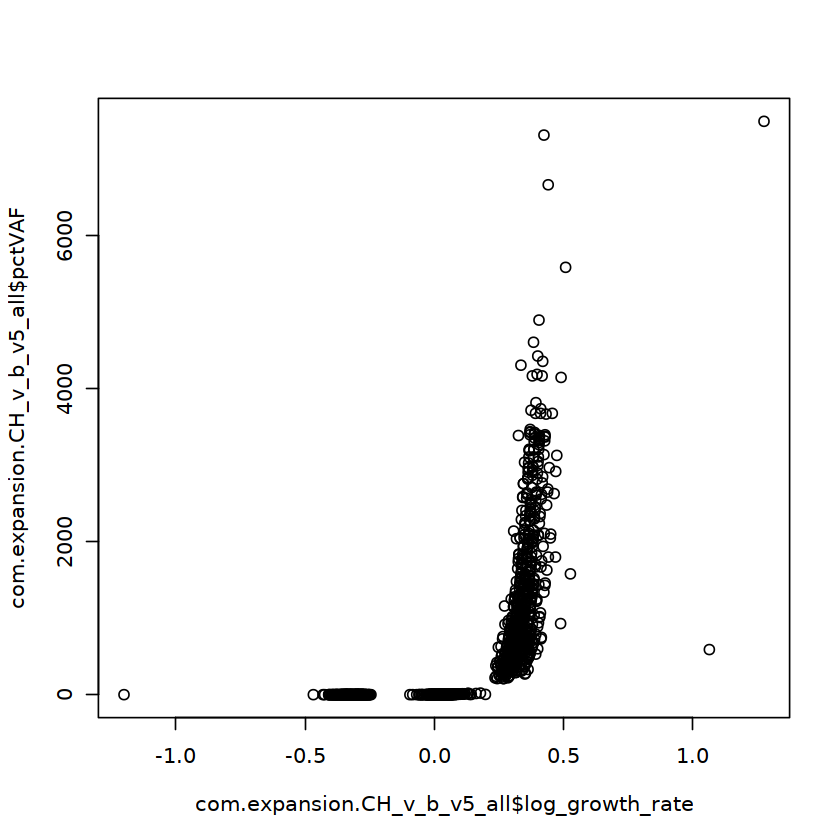

In [67]:
plot(com.expansion.CH_v_b_v5_all$log_growth_rate, com.expansion.CH_v_b_v5_all$pctVAF)

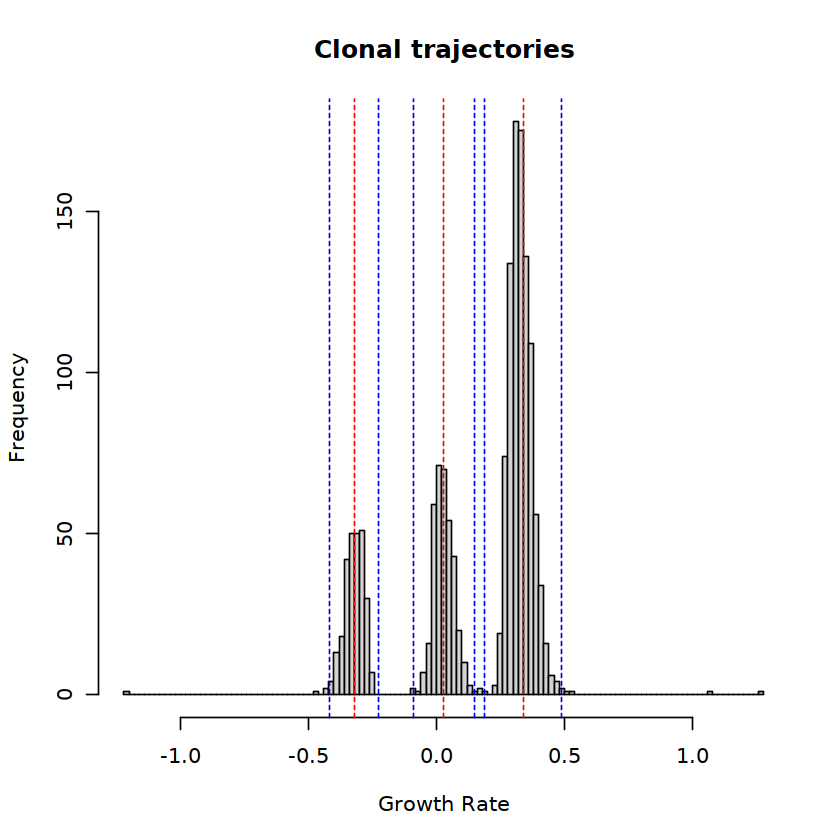

In [68]:
hist(com.expansion.CH_v_b_v5_all$log_growth_rate, breaks = 100, xlab = "Growth Rate", main="Clonal trajectories")
abline(v = c(-0.32,0.029,0.34), col = "red", lty = 2)
abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)

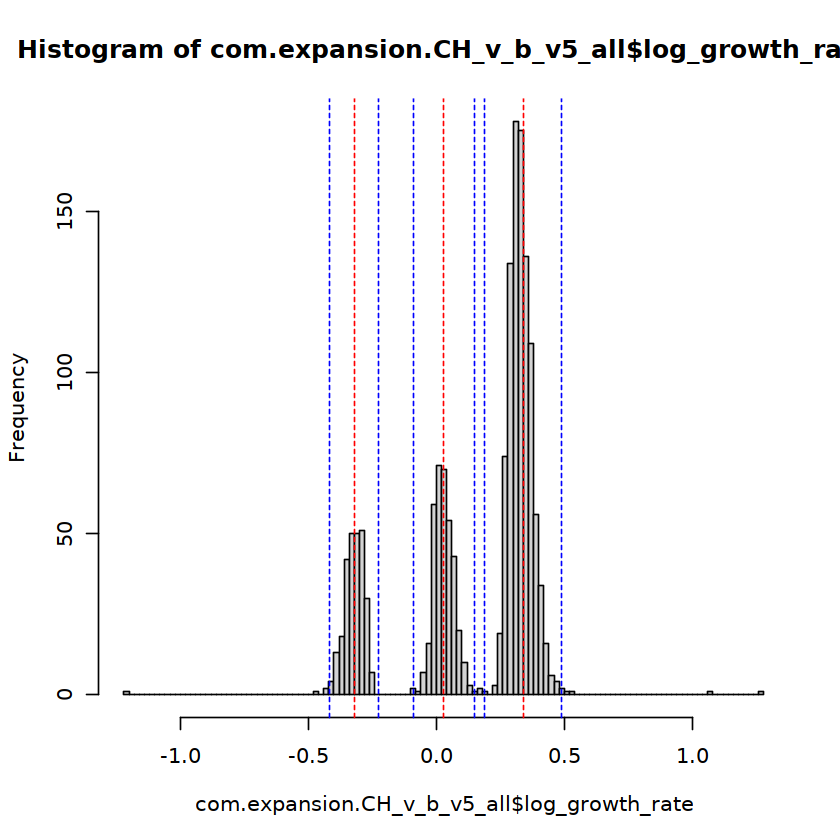

In [69]:
# Plot the histogram of the data with the boundaries marked
hist(com.expansion.CH_v_b_v5_all$log_growth_rate, breaks = 100)
abline(v = c(-0.32,0.029,0.34), col = "red", lty = 2)
abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)

In [70]:
## Gene Gropu: D, T, A, DDR, SF, Other
com.expansion.CH_v_b_v5_all$Gene_Group <- ifelse(com.expansion.CH_v_b_v5_all$Gene =="DNMT3A", "DNMT3A",
                                                 ifelse(com.expansion.CH_v_b_v5_all$Gene=="TET2", "TET2",
                                                        ifelse(com.expansion.CH_v_b_v5_all$Gene=="ASXL1", "ASXL1",
                                                               ifelse(com.expansion.CH_v_b_v5_all$Gene %in% c("PPM1D", "TP53"), "DDR", 
                                                                      ifelse(com.expansion.CH_v_b_v5_all$Gene %in% c("SF3B1", "SRSF2","U2AF1", "ZRSR2"), "SF","Other")))))
table(com.expansion.CH_v_b_v5_all$Gene_Group)


 ASXL1    DDR DNMT3A  Other     SF   TET2 
   103     79    594    405     92    306 

In [71]:
# count>20              
com.expansion.CH_v_b_v5_all$Gene_Group_2 <- ifelse(com.expansion.CH_v_b_v5_all$Gene =="DNMT3A", "DNMT3A",
                                                 ifelse(com.expansion.CH_v_b_v5_all$Gene=="TET2", "TET2",
                                                        ifelse(com.expansion.CH_v_b_v5_all$Gene=="ASXL1", "ASXL1",
                                                               ifelse(com.expansion.CH_v_b_v5_all$Gene=="SF3B1", "SF3B1", 
                                                                      ifelse(com.expansion.CH_v_b_v5_all$Gene=="PPM1D", "PPM1D",
                                                                             ifelse(com.expansion.CH_v_b_v5_all$Gene=="TP53", "TP53",
                                                                                    ifelse(com.expansion.CH_v_b_v5_all$Gene=="ZNF318", "ZNF318",
                                                                                           ifelse(com.expansion.CH_v_b_v5_all$Gene=="YLPM1", "YLPM1",
                                                                                                  ifelse(com.expansion.CH_v_b_v5_all$Gene=="SRSF2", "SRSF2",
                                                                                                         ifelse(com.expansion.CH_v_b_v5_all$Gene=="ZBTB33", "ZBTB33",
                                                                                                                ifelse(com.expansion.CH_v_b_v5_all$Gene=="STAG2", "STAG2",
                                                                                                                       ifelse(com.expansion.CH_v_b_v5_all$Gene=="SRCAP", "SRCAP",
                                                                                                                              ifelse(com.expansion.CH_v_b_v5_all$Gene=="PDS5B", "PDS5B","Other")))))))))))))
sort(table(com.expansion.CH_v_b_v5_all$Gene_Group_2))


 PDS5B  SRCAP  STAG2 ZBTB33  SRSF2  YLPM1 ZNF318   TP53  PPM1D  SF3B1  ASXL1 
    21     23     28     28     29     29     32     37     42     42    103 
 Other   TET2 DNMT3A 
   265    306    594 

In [72]:
# DNMT3A: "R882H" (27); "R882C" (14)
# TET2 "I1873T" (12)
# ASXL1 "G646Wfs*12" (20) "E635Rfs*15" (9)
# SF3B1 "K700E" (16) c("K666N", "K666R", "K666E", "K666T", "K666Q")
# PPM1D "R552X" (9)
# SRSF2 "P95H" (17) "P95L" (10) "P95R" (1) "Y44H" (1)
# JAK2 "V617F" (19)
# U2AF1 "Q157P" (8) "Q157R" (3) "S34F" (1)
sort(table(com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$Gene=="U2AF1"]), decreasing = T)


Q157P Q157R  S34F 
    8     3     1 

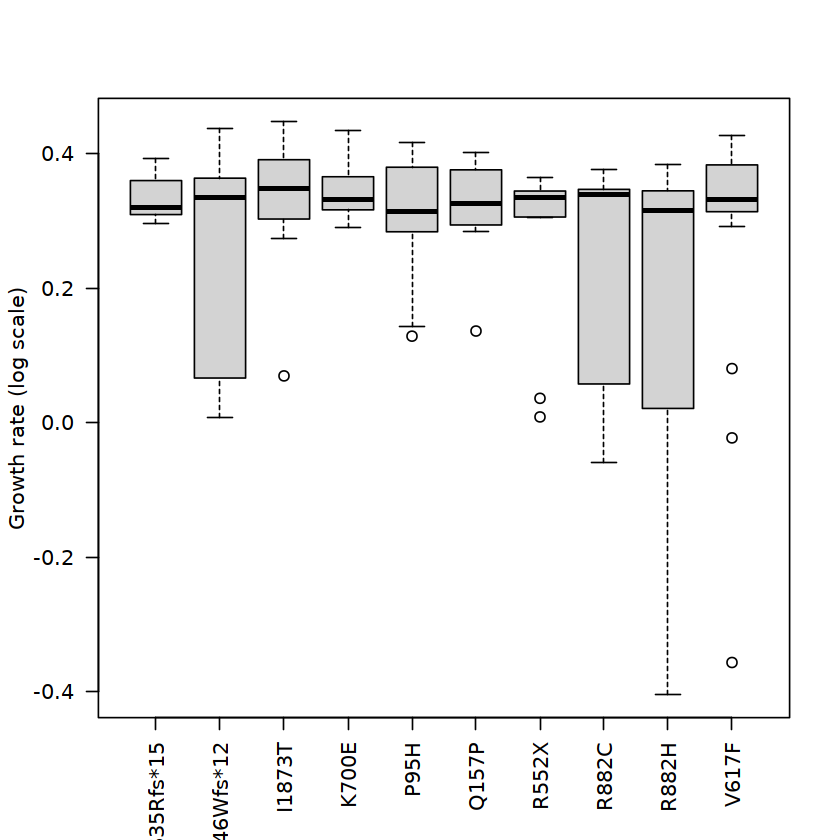

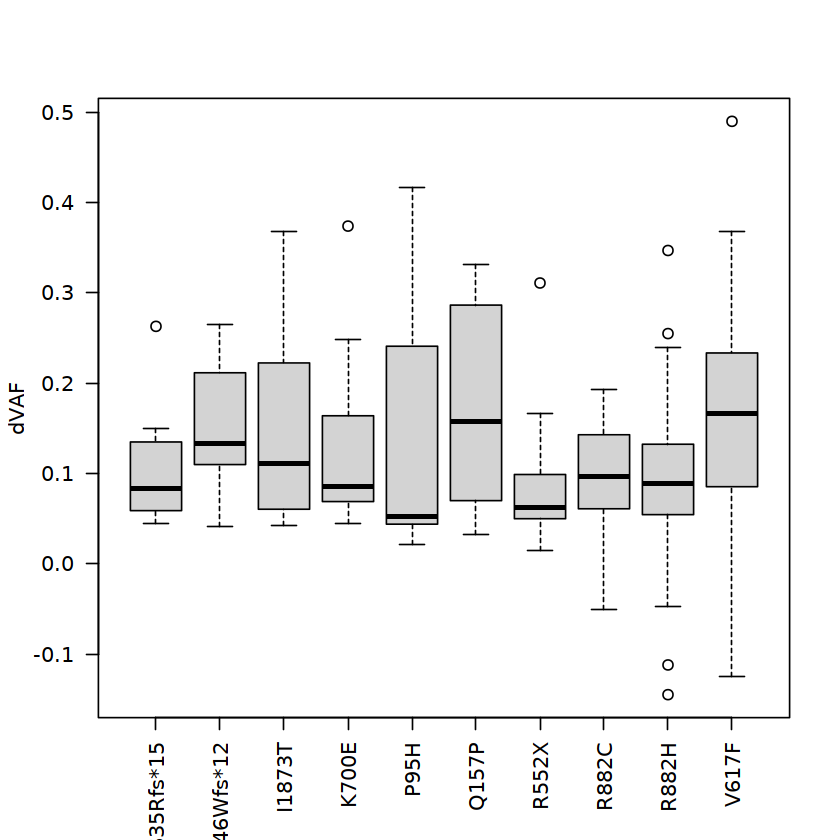

In [73]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")] ~ com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")], las=2, xlab ="", ylab="Growth rate (log scale)")

boxplot(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")] ~ com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")], las=2, xlab ="", ylab="dVAF")

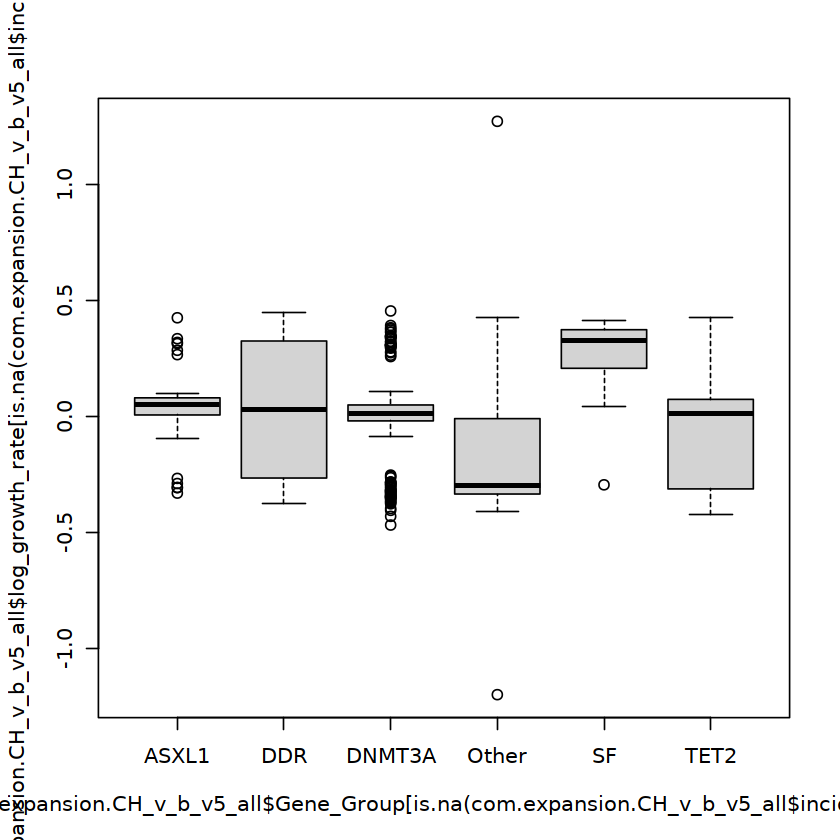

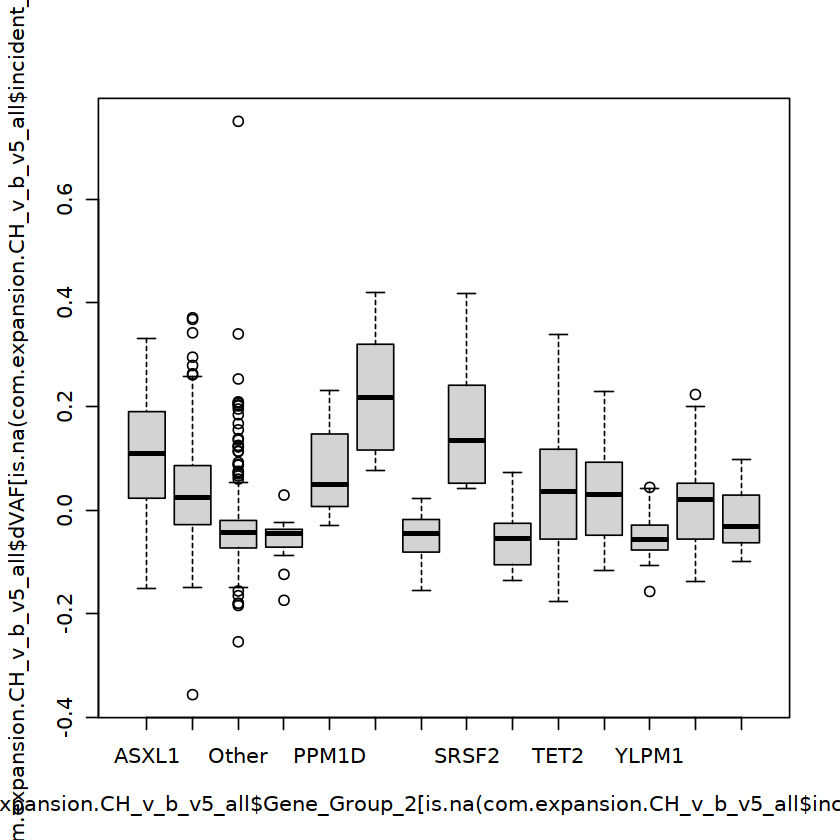

In [74]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate[is.na(com.expansion.CH_v_b_v5_all$incident_CH)] ~ com.expansion.CH_v_b_v5_all$Gene_Group[is.na(com.expansion.CH_v_b_v5_all$incident_CH)])
boxplot(com.expansion.CH_v_b_v5_all$dVAF[is.na(com.expansion.CH_v_b_v5_all$incident_CH)] ~ com.expansion.CH_v_b_v5_all$Gene_Group_2[is.na(com.expansion.CH_v_b_v5_all$incident_CH)])

In [75]:
table(com.expansion.CH_v_b_v5_all$incident_CH, exclude = NULL)


   1 <NA> 
 876  703 

In [76]:
summary(com.expansion.CH_v_b_v5_all$VAF.v5, com.expansion.CH_v_b_v5_all$VAF.v2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0001  0.0380  0.0720  0.1088  0.1495  0.7500 

In [77]:
nrow(com.expansion.CH_v_b_v5_all)
cat("all baseline CH\t",table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02),"\n")

cat("all visit 05 CH\t",table(com.expansion.CH_v_b_v5_all$VAF.v5>=0.02),"\n")

cat("VAF>=2% in both visit\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")

cat("VAF>=2% in baseline only\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02 & com.expansion.CH_v_b_v5_all$VAF.v5<0.02), "\n")

    # incident clones
cat("incident clones\t", table(com.expansion.CH_v_b_v5_all$VAF.v2<0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")

cat("clones\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")


[1] 1579

all baseline CH	 972 607 
all visit 05 CH	 270 1309 
VAF>=2% in both visit	 1242 337 
VAF>=2% in baseline only	 1309 270 
incident clones	 607 972 
clones	 1220 359 


In [78]:
table(com.expansion.CH_v_b_v5_all$VAF.v2[com.expansion.CH_v_b_v5_all$VAF.v2<0.02])


1e-04 0.007 0.009  0.01 0.011 0.012 0.013 0.014 0.016 0.017 0.018 0.019 
  950     1     2     1     2     2     2     1     4     1     3     3 

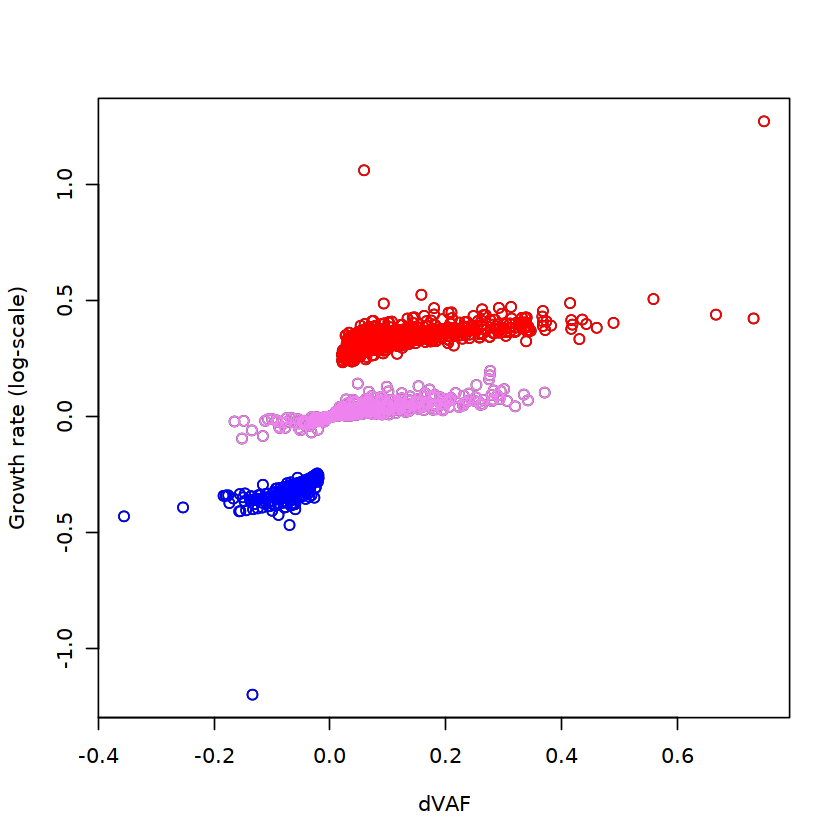

In [79]:
plot(x=com.expansion.CH_v_b_v5_all$dVAF, y=com.expansion.CH_v_b_v5_all$log_growth_rate,   
     xlab = "dVAF", ylab = "Growth rate (log-scale)")
 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v2==1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2==1e-4], 
        col="red")

 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v5==1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v5==1e-4], 
        col="blue")

 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4], 
        col="violet")
# points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], col="blue")

# abline(h = c(-0.2,0.2), col = "blue", lty = 2)

In [80]:
# both visit
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & 
                                                    com.expansion.CH_v_b_v5_all$VAF.v5>1e-4])
# incident CH
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2<0.02])
# only baseline
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v5<0.02])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.094577  0.002396  0.028421  0.030380  0.055701  0.197490 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02023 0.29827 0.32539 0.32722 0.35735 1.27467 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.20007 -0.34352 -0.31811 -0.32337 -0.29299 -0.06834 

In [81]:
## Clone status based on detected/imputed VAF
com.expansion.CH_v_b_v5_all$Clone_status <- ifelse(com.expansion.CH_v_b_v5_all$VAF.v2<0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02, "Incident", ifelse(com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4, "Both", "Baseline"))

table(com.expansion.CH_v_b_v5_all$Clone_status )


Baseline     Both Incident 
     269      338      972 

In [82]:
## Growth status 
  # expanded = log_growth_rate>0 & dVAF>=0.02 and pctVAF>= 10% 
  # shrinking = log_growth_rate<0 & dVAF<= -0.02 & pctVAF<= -10%
com.expansion.CH_v_b_v5_all$Trajectory <- ifelse(com.expansion.CH_v_b_v5_all$log_growth_rate>0 & 
                                                 com.expansion.CH_v_b_v5_all$pctVAF>=0.1 & 
                                                 com.expansion.CH_v_b_v5_all$dVAF>=0.02, "Growing", 
                                                 ifelse(com.expansion.CH_v_b_v5_all$log_growth_rate<0 & 
                                                        com.expansion.CH_v_b_v5_all$pctVAF<= -0.1 & 
                                                        com.expansion.CH_v_b_v5_all$dVAF<= -0.02, 
                                                        "Shrinking", "Static"))

table(com.expansion.CH_v_b_v5_all$Trajectory, exclude = NULL)


  Growing Shrinking    Static 
     1186       308        85 

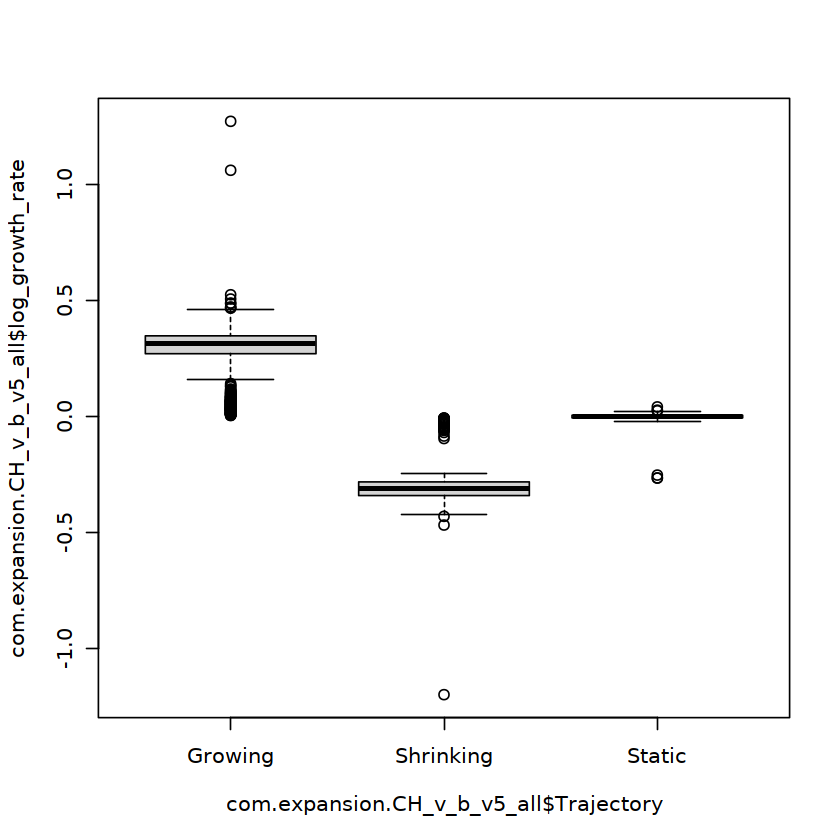

In [83]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate ~ com.expansion.CH_v_b_v5_all$Trajectory)

In [84]:
## incident clones
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$Clone_status=="Incident"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02023 0.29827 0.32539 0.32722 0.35735 1.27467 

In [267]:
# fwrite(com.expansion.CH_v_b_v5_all, "combined.expansion.CH_v_b_v5_all.growth_rate.23Mar2023.csv", 
 #      row.names = F, col.names = T, sep=",", na = "NA")

## Mixed model for clonal growth

In [3]:
com.expansion.CH_v_b_v5_all <- fread("combined.expansion.CH_v_b_v5_all.growth_rate.23Mar2023.csv", header=T)

In [4]:
str(com.expansion.CH_v_b_v5_all)

Classes 'data.table' and 'data.frame':	1579 obs. of  134 variables:
 $ varID_GWASID        : chr  "chr10_87931087_GAGGT_G_A07861" "chr10_87933249_AAGGTAAGTTATTTTTTGATGTT_A_A06550" "chr10_87960969_G_T_A04739" "chr11_119278221_G_A_A14253" ...
 $ GWAS_ID             : chr  "A07861" "A06550" "A04739" "A14253" ...
 $ CHR                 : chr  "chr10" "chr10" "chr10" "chr11" ...
 $ POS                 : int  87931087 87933249 87960969 119278221 119278257 119278263 119278269 119278274 119278281 119278289 ...
 $ REF                 : chr  "GAGGT" "AAGGTAAGTTATTTTTTGATGTT" "G" "G" ...
 $ ALT                 : chr  "G" "A" "T" "A" ...
 $ Gene                : chr  "PTEN" "PTEN" "PTEN" "CBL" ...
 $ AD.v5               : chr  "63,50" "77,3" "142,6" "136,5" ...
 $ VAF.v5              : num  0.449 0.044 0.037 0.045 0.367 0.297 0.071 0.071 0.077 0.086 ...
 $ DP.v5               : int  113 80 148 141 69 126 100 110 110 103 ...
 $ AD.Alt.v5           : int  50 3 6 5 23 34 5 6 9 7 ...
 $ FR.Alt.v5     

In [5]:
names(com.expansion.CH_v_b_v5_all)

[1] "varID_GWASID"         "GWAS_ID"              "CHR"                 
  [4] "POS"                  "REF"                  "ALT"                 
  [7] "Gene"                 "AD.v5"                "VAF.v5"              
 [10] "DP.v5"                "AD.Alt.v5"            "FR.Alt.v5"           
 [13] "RR.Alt.v5"            "Accession"            "transcriptOI"        
 [16] "NonsynOI"             "Func.refGene"         "ExonicFunc.refGene"  
 [19] "AAChange.refGene"     "ARIC_ID"              "Gender"              
 [22] "Age"                  "CH_baseline"          "CH_v05"              
 [25] "incident_CH"          "incident_CHvaf05"     "incident_CHvaf10"    
 [28] "incident_DTA"         "incident_SF"          "incident_DDR"        
 [31] "sex_v5"               "race_v5"              "center_v5"           
 [34] "dob_v5"               "date_v5"              "age_v5"              
 [37] "fast_8_v5"            "bmi_v5"               "dm_126_v5"           
 [40] "gluc_v5"              "htn_5_v5"             "chol_v5"             
 [43] "hdl_v5"               "ldl_v5"               "tg_v5"               
 [46] "chol_med_v5"          "statin_v5"            "cig_v5"              
 [49] "chd_v5"               "is_v5"                "hs_v5"               
 [52] "hf_v5"                "death.v5"             "death_date.v5"       
 [55] "bmi_v5_std"           "gluc_v5_std"          "chol_v5_std"         
 [58] "hdl_v5_std"           "ldl_v5_std"           "tg_v5_std"           
 [61] "non_hdl_v5_std"       "hg38_CRAM_ID"         "aricid"              
 [64] "Visit.v2"             "sex"                  "race"                
 [67] "center"               "dob"                  "date_base"           
 [70] "age_base"             "fast_8_base"          "bmi_base"            
 [73] "dm_126_base"          "gluc_base"            "htn_5_base"          
 [76] "chol_base"            "hdl_base"             "ldl_base"            
 [79] "tg_base"              "chol_med_base"        "statin_base"         
 [82] "cig_base"             "chd_date"             "is_date"             
 [85] "hs_date"              "hf_date"              "death.v2"            
 [88] "death_date.v2"        "lfu_date"             "chd_base"            
 [91] "is_base"              "hs_base"              "hf_base"             
 [94] "ever_smoke"           "v2_vs_other"          "Sex"                 
 [97] "race_BW"              "BMI_cat"              "nonHDL_std"          
[100] "hdl_base_std"         "ldl_base_std"         "chol_base_std"       
[103] "tg_base_std"          "gluc_base_std"        "bmi_base_std"        
[106] "CHvaf10_baseline"     "CH_baseline_v05"      "CHvaf10_baseline_v05"
[109] "CH_DTA"               "CH_SF"                "CH_DDR"              
[112] "CH_DNMT3A"            "CH_TET2"              "CH_ASXL1"            
[115] "Center"               "nonHDL_base_std"      "age_base_sqr"        
[118] "DP_sqrt"              "AD.v2"                "VAF.v2"              
[121] "DP.v2"                "AD.Alt.v2"            "FR.Alt.v2"           
[124] "RR.Alt.v2"            "Batch"                "dAge"                
[127] "dVAF"                 "pctVAF"               "growth_rate"         
[130] "log_growth_rate"      "Gene_Group"           "Gene_Group_2"        
[133] "Clone_status"         "Trajectory"

In [9]:
table(is.na(com.expansion.CH_v_b_v5_all$DP.v5))
table(is.na(com.expansion.CH_v_b_v5_all$DP.v2))
table((com.expansion.CH_v_b_v5_all$Trajectory))
table((com.expansion.CH_v_b_v5_all$Clone_status))
table((com.expansion.CH_v_b_v5_all$Trajectory[com.expansion.CH_v_b_v5_all$Clone_status=="Both"]))
table((com.expansion.CH_v_b_v5_all$Trajectory[com.expansion.CH_v_b_v5_all$Clone_status=="Both" & 
                                              !is.na(com.expansion.CH_v_b_v5_all$DP.v5) & 
                                              !is.na(com.expansion.CH_v_b_v5_all$DP.v2)]))

## CHIP detected at both visit
com.expansion.CH_v_b_v5_both_visit <- subset(com.expansion.CH_v_b_v5_all, 
                                             com.expansion.CH_v_b_v5_all$Clone_status=="Both")
nrow(com.expansion.CH_v_b_v5_both_visit)


FALSE  TRUE 
 1310   269 


FALSE  TRUE 
  629   950 


  Growing Shrinking    Static 
     1183       307        89 


Baseline     Both Incident 
     269      338      972 


  Growing Shrinking    Static 
      214        41        83 


  Growing Shrinking    Static 
      214        41        83 

[1] 338

In [10]:
## Scale
### 
  ### source:  https://www.biostars.org/p/80597/ and the supplement of Yang et al. Nature 2012.
INT_yang2012 <- function(x){
  y<-qnorm((rank(x,na.last='keep')-0.5)/sum(!is.na(x)))
  return(y)
}

In [13]:
# INT Scale BMI, HDL, non-HDL values
com.expansion.CH_v_b_v5_both_visit$hdl_v5_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$hdl_v5)
com.expansion.CH_v_b_v5_both_visit$nonHDL_v5_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$chol_v5 - com.expansion.CH_v_b_v5_both_visit$hdl_v5)
com.expansion.CH_v_b_v5_both_visit$bmi_v5_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$bmi_v5)

com.expansion.CH_v_b_v5_both_visit$hdl_base_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$hdl_base)
com.expansion.CH_v_b_v5_both_visit$nonHDL_base_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$chol_base - com.expansion.CH_v_b_v5_both_visit$hdl_base)
com.expansion.CH_v_b_v5_both_visit$bmi_base_INT <- INT_yang2012(com.expansion.CH_v_b_v5_both_visit$bmi_base)


In [27]:
cor(com.expansion.CH_v_b_v5_both_visit$bmi_base_INT, com.expansion.CH_v_b_v5_both_visit$bmi_v5_INT, use="complete")

cor(com.expansion.CH_v_b_v5_both_visit$bmi_base, com.expansion.CH_v_b_v5_both_visit$bmi_v5, use="complete")

cor(com.expansion.CH_v_b_v5_both_visit$hdl_base_INT, com.expansion.CH_v_b_v5_both_visit$hdl_v5_INT, use="complete")

cor(com.expansion.CH_v_b_v5_both_visit$nonHDL_base_INT, com.expansion.CH_v_b_v5_both_visit$nonHDL_v5_INT, use="complete")

summary(com.expansion.CH_v_b_v5_both_visit$hdl_v5)
summary(com.expansion.CH_v_b_v5_both_visit$chol_v5)

[1] 0.7737834

[1] 0.7739122

[1] 0.5649117

[1] 0.1104785

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4913  1.0861  1.2671  1.3168  1.4999  2.9998 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.405   3.756   4.383   4.567   5.146   9.930 

In [12]:
summary(com.expansion.CH_v_b_v5_both_visit)

 varID_GWASID         GWAS_ID              CHR                 POS           
 Length:338         Length:338         Length:338         Min.   :  1815790  
 Class :character   Class :character   Class :character   1st Qu.: 25240710  
 Mode  :character   Mode  :character   Mode  :character   Median : 25247143  
                                                          Mean   : 46258789  
                                                          3rd Qu.: 43357397  
                                                          Max.   :213147702  
                                                                             
     REF                ALT                Gene              AD.v5          
 Length:338         Length:338         Length:338         Length:338        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                    

### old analyses

In [86]:
summary(com.expansion.CH_v_b_v5_all)

 varID_GWASID         GWAS_ID              CHR                 POS           
 Length:1579        Length:1579        Length:1579        Min.   :  1659994  
 Class :character   Class :character   Class :character   1st Qu.: 25241665  
 Mode  :character   Mode  :character   Mode  :character   Median : 32434599  
                                                          Mean   : 58891230  
                                                          3rd Qu.:105236631  
                                                          Max.   :213147702  
                                                                             
     REF                ALT                Gene              AD.v5          
 Length:1579        Length:1579        Length:1579        Length:1579       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                    

In [87]:
v2.com.expansion.CH_v_b_v5_all <- com.expansion.CH_v_b_v5_all
v2.com.expansion.CH_v_b_v5_all$hdl_v5_std <- scale(v2.com.expansion.CH_v_b_v5_all$hdl_v5)
v2.com.expansion.CH_v_b_v5_all$nonHDL_v5_std <- scale(v2.com.expansion.CH_v_b_v5_all$chol_v5 - v2.com.expansion.CH_v_b_v5_all$hdl_v5)
v2.com.expansion.CH_v_b_v5_all$bmi_v5_std <- scale(v2.com.expansion.CH_v_b_v5_all$bmi_v5)

v2.com.expansion.CH_v_b_v5_all$hdl_base_std <- scale(v2.com.expansion.CH_v_b_v5_all$hdl_base)
v2.com.expansion.CH_v_b_v5_all$nonHDL_base_std <- scale(v2.com.expansion.CH_v_b_v5_all$chol_base - v2.com.expansion.CH_v_b_v5_all$hdl_base)
v2.com.expansion.CH_v_b_v5_all$bmi_base_std <- scale(v2.com.expansion.CH_v_b_v5_all$bmi_base)


In [88]:
v2.com.expansion.CH_v_b_v5_all$Visit.v5 <- "V05"

In [89]:
str(v2.com.expansion.CH_v_b_v5_all)

Classes 'data.table' and 'data.frame':	1579 obs. of  136 variables:
 $ varID_GWASID        : chr  "chr10_87931087_GAGGT_G_A07861" "chr10_87933249_AAGGTAAGTTATTTTTTGATGTT_A_A06550" "chr10_87960969_G_T_A04739" "chr11_119278221_G_A_A14253" ...
 $ GWAS_ID             : chr  "A07861" "A06550" "A04739" "A14253" ...
 $ CHR                 : chr  "chr10" "chr10" "chr10" "chr11" ...
 $ POS                 : int  87931087 87933249 87960969 119278221 119278257 119278263 119278269 119278274 119278281 119278289 ...
 $ REF                 : chr  "GAGGT" "AAGGTAAGTTATTTTTTGATGTT" "G" "G" ...
 $ ALT                 : chr  "G" "A" "T" "A" ...
 $ Gene                : chr  "PTEN" "PTEN" "PTEN" "CBL" ...
 $ AD.v5               : chr  "63,50" "77,3" "142,6" "136,5" ...
 $ VAF.v5              : num  0.449 0.044 0.037 0.045 0.367 0.297 0.071 0.071 0.077 0.086 ...
 $ DP.v5               : int  113 80 148 141 69 126 100 110 110 103 ...
 $ AD.Alt.v5           : int  50 3 6 5 23 34 5 6 9 7 ...
 $ FR.Alt.v5     

In [90]:
sort(table( v2.com.expansion.CH_v_b_v5_all$ExonicFunc.refGene), decreasing=T)

sort(table(v2.com.expansion.CH_v_b_v5_all$Func.refGene ), decreasing=T)

(table(v2.com.expansion.CH_v_b_v5_all$ExonicFunc.refGene, v2.com.expansion.CH_v_b_v5_all$Func.refGene))

# sort(table(v2.com.expansion.CH_v_b_v5_all$NonsynOI ), decreasing = T)



     nonsynonymous SNV               stopgain    frameshift deletion 
                   682                    413                    220 
                     .   frameshift insertion nonframeshift deletion 
                   154                    100                     10 


  exonic splicing 
    1425      154 

                        
                         exonic splicing
  .                           0      154
  frameshift deletion       220        0
  frameshift insertion      100        0
  nonframeshift deletion     10        0
  nonsynonymous SNV         682        0
  stopgain                  413        0

In [91]:
v2.com.expansion.CH_v_b_v5_all$Mut_Type <- ifelse(v2.com.expansion.CH_v_b_v5_all$ExonicFunc.refGene=="nonsynonymous SNV", 
                                                  "nsSNV",
                                                  ifelse(v2.com.expansion.CH_v_b_v5_all$ExonicFunc.refGene %in% c("frameshift deletion", "frameshift insertion","nonframeshift deletion"), 
                                                         "indel", 
                                                         ifelse(v2.com.expansion.CH_v_b_v5_all$ExonicFunc.refGene == "stopgain", "Stopgain", "Splicing")))

table(v2.com.expansion.CH_v_b_v5_all$Mut_Type)


Splicing Stopgain    indel    nsSNV 
     154      413      330      682 

In [92]:
## Gene Gropu: D, T, A, DDR, SF, Other
v2.com.expansion.CH_v_b_v5_all$Gene_Group <- ifelse(v2.com.expansion.CH_v_b_v5_all$Gene =="DNMT3A", 
                                                    "DNMT3A",
                                                 ifelse(v2.com.expansion.CH_v_b_v5_all$Gene=="TET2", 
                                                        "TET2",
                                                        ifelse(v2.com.expansion.CH_v_b_v5_all$Gene=="ASXL1", 
                                                               "ASXL1",
                                                               ifelse(v2.com.expansion.CH_v_b_v5_all$Gene %in% c("PPM1D", "TP53"), 
                                                                      "DDR", 
                                                                      ifelse(v2.com.expansion.CH_v_b_v5_all$Gene %in% c("SF3B1", "SRSF2","U2AF1", "ZRSR2"), 
                                                                             "SF","Other")))))
table(v2.com.expansion.CH_v_b_v5_all$Gene_Group)


 ASXL1    DDR DNMT3A  Other     SF   TET2 
   103     79    594    405     92    306 

In [93]:
table(v2.com.expansion.CH_v_b_v5_all$cig_base, exclude = NULL)
table(v2.com.expansion.CH_v_b_v5_all$cig_v5, exclude= NULL)


   1    2    3 <NA> 
 247  645  683    4 


   1    2    3    4 <NA> 
  87  776  514  149   53 

In [94]:
table(is.na(v2.com.expansion.CH_v_b_v5_all$cig_v5))


FALSE  TRUE 
 1526    53 

In [95]:
# 1 current 2 former 3 never 4 unknown . Missing
v2.com.expansion.CH_v_b_v5_all$ever_smoke_base <- ifelse(v2.com.expansion.CH_v_b_v5_all$cig_base==1 |
                                                         v2.com.expansion.CH_v_b_v5_all$cig_base==2,1,
                                                         ifelse(v2.com.expansion.CH_v_b_v5_all$cig_base==3,0,
                                                                ifelse(is.na(v2.com.expansion.CH_v_b_v5_all$cig_base) | 
                                                                       v2.com.expansion.CH_v_b_v5_all$cig_base==4,
                                                                       2, NA )))
table(v2.com.expansion.CH_v_b_v5_all$ever_smoke_base, exclude = NULL)

v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5 <- ifelse(v2.com.expansion.CH_v_b_v5_all$cig_v5==1 |
                                                       v2.com.expansion.CH_v_b_v5_all$cig_v5==2,1,
                                                         ifelse(v2.com.expansion.CH_v_b_v5_all$cig_v5==3,0,
                                                                ifelse(is.na(v2.com.expansion.CH_v_b_v5_all$cig_v5) | 
                                                                       v2.com.expansion.CH_v_b_v5_all$cig_v5==4,
                                                                       2, NA )))
table(v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5, exclude = NULL)


   0    1 <NA> 
 683  892    4 


   0    1    2 <NA> 
 514  863  149   53 

In [96]:
v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5[is.na(v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5)] <- 2
table(v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5, exclude = NULL)
v2.com.expansion.CH_v_b_v5_all$ever_smoke_base[is.na(v2.com.expansion.CH_v_b_v5_all$ever_smoke_base)] <- 2
table(v2.com.expansion.CH_v_b_v5_all$ever_smoke_base, exclude = NULL)


  0   1   2 
514 863 202 


  0   1   2 
683 892   4 

In [98]:
long.v2.com.expansion.CH_v_b_v5_all <- as.data.frame(matrix(NA,2*nrow(v2.com.expansion.CH_v_b_v5_all), 18) )

names(long.v2.com.expansion.CH_v_b_v5_all) <- c("GWAS_ID","varID_GWASID", "Visit", "Age" , "Gene",
                   "VAF","NonsynOI","Mut_Type", "Gender", "Ancestry", "Center", "DP_sqrt", "ever_smoke", 
                        "hdl", "nonHDL_std", "chol_med", "bmi", "Age2")

In [100]:
long.v2.com.expansion.CH_v_b_v5_all$GWAS_ID <- c(v2.com.expansion.CH_v_b_v5_all$GWAS_ID, 
                          v2.com.expansion.CH_v_b_v5_all$GWAS_ID)

long.v2.com.expansion.CH_v_b_v5_all$varID_GWASID <- c(v2.com.expansion.CH_v_b_v5_all$varID_GWASID, 
                          v2.com.expansion.CH_v_b_v5_all$varID_GWASID)

long.v2.com.expansion.CH_v_b_v5_all$Visit <- c(v2.com.expansion.CH_v_b_v5_all$v2_vs_other, 
                          v2.com.expansion.CH_v_b_v5_all$Visit.v5)

long.v2.com.expansion.CH_v_b_v5_all$Age <- c(v2.com.expansion.CH_v_b_v5_all$age_base, 
                          v2.com.expansion.CH_v_b_v5_all$Age)

long.v2.com.expansion.CH_v_b_v5_all$Gene <- c(v2.com.expansion.CH_v_b_v5_all$Gene, 
                          v2.com.expansion.CH_v_b_v5_all$Gene)

long.v2.com.expansion.CH_v_b_v5_all$Gene_Group <- c(v2.com.expansion.CH_v_b_v5_all$Gene_Group, 
                          v2.com.expansion.CH_v_b_v5_all$Gene_Group)


long.v2.com.expansion.CH_v_b_v5_all$VAF <- c(v2.com.expansion.CH_v_b_v5_all$VAF.v2, 
                          v2.com.expansion.CH_v_b_v5_all$VAF.v5)

long.v2.com.expansion.CH_v_b_v5_all$NonsynOI <- c(v2.com.expansion.CH_v_b_v5_all$NonsynOI, 
                          v2.com.expansion.CH_v_b_v5_all$NonsynOI)

long.v2.com.expansion.CH_v_b_v5_all$Mut_Type <- c(v2.com.expansion.CH_v_b_v5_all$Mut_Type, 
                          v2.com.expansion.CH_v_b_v5_all$Mut_Type)

long.v2.com.expansion.CH_v_b_v5_all$Gender <- c(v2.com.expansion.CH_v_b_v5_all$Gender, 
                          v2.com.expansion.CH_v_b_v5_all$Gender)

long.v2.com.expansion.CH_v_b_v5_all$Ancestry <- c(v2.com.expansion.CH_v_b_v5_all$race_BW, 
                          v2.com.expansion.CH_v_b_v5_all$race_BW)

long.v2.com.expansion.CH_v_b_v5_all$DP <- c(v2.com.expansion.CH_v_b_v5_all$DP.v2, 
                          v2.com.expansion.CH_v_b_v5_all$DP.v5)

long.v2.com.expansion.CH_v_b_v5_all$DP_sqrt <- sqrt(long.v2.com.expansion.CH_v_b_v5_all$DP)

long.v2.com.expansion.CH_v_b_v5_all$ever_smoke <- c(v2.com.expansion.CH_v_b_v5_all$ever_smoke_base, 
                          v2.com.expansion.CH_v_b_v5_all$ever_smoke_v5)

long.v2.com.expansion.CH_v_b_v5_all$hdl <- c(v2.com.expansion.CH_v_b_v5_all$hdl_base_std, 
                          v2.com.expansion.CH_v_b_v5_all$hdl_v5_std)

long.v2.com.expansion.CH_v_b_v5_all$nonHDL_std <- c(v2.com.expansion.CH_v_b_v5_all$nonHDL_base_std, 
                          v2.com.expansion.CH_v_b_v5_all$nonHDL_v5_std)

long.v2.com.expansion.CH_v_b_v5_all$chol_med <- c(v2.com.expansion.CH_v_b_v5_all$chol_med_base, 
                          v2.com.expansion.CH_v_b_v5_all$chol_med_v5)

long.v2.com.expansion.CH_v_b_v5_all$bmi <- c(v2.com.expansion.CH_v_b_v5_all$bmi_base_std, 
                          v2.com.expansion.CH_v_b_v5_all$bmi_v5_std)

long.v2.com.expansion.CH_v_b_v5_all$center <- c(v2.com.expansion.CH_v_b_v5_all$center, 
                          v2.com.expansion.CH_v_b_v5_all$center_v5)


In [101]:
table(long.v2.com.expansion.CH_v_b_v5_all$Visit)


Others    V02    V05 
   295   1284   1579 

In [105]:
table(long.v2.com.expansion.CH_v_b_v5_all$center, exclude = NULL)


   F    J    M    W 
 591  613 1174  780 

In [104]:
long.v2.com.expansion.CH_v_b_v5_all$center[long.v2.com.expansion.CH_v_b_v5_all$center==""] <- "F"

In [106]:

long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_fact <- factor(x = long.v2.com.expansion.CH_v_b_v5_all$Gene_Group, 
                                                              levels = c("DNMT3A", "TET2", "ASXL1", "SF", "DDR", "Other"))

long.v2.com.expansion.CH_v_b_v5_all$Age2 <- long.v2.com.expansion.CH_v_b_v5_all$Age^2

In [107]:
summary(long.v2.com.expansion.CH_v_b_v5_all)

   GWAS_ID          varID_GWASID          Visit                Age       
 Length:3158        Length:3158        Length:3158        Min.   :45.00  
 Class :character   Class :character   Class :character   1st Qu.:56.00  
 Mode  :character   Mode  :character   Mode  :character   Median :68.00  
                                                          Mean   :66.95  
                                                          3rd Qu.:77.00  
                                                          Max.   :90.00  
                                                                         
     Gene                VAF            NonsynOI           Mut_Type        
 Length:3158        Min.   :0.00010   Length:3158        Length:3158       
 Class :character   1st Qu.:0.00010   Class :character   Class :character  
 Mode  :character   Median :0.04400   Mode  :character   Mode  :character  
                    Mean   :0.07321                                        
                    3rd Qu.:

In [108]:
str(long.v2.com.expansion.CH_v_b_v5_all)

'data.frame':	3158 obs. of  22 variables:
 $ GWAS_ID        : chr  "A07861" "A06550" "A04739" "A14253" ...
 $ varID_GWASID   : chr  "chr10_87931087_GAGGT_G_A07861" "chr10_87933249_AAGGTAAGTTATTTTTTGATGTT_A_A06550" "chr10_87960969_G_T_A04739" "chr11_119278221_G_A_A14253" ...
 $ Visit          : chr  "V02" "V02" "V02" "V02" ...
 $ Age            : int  63 60 48 58 64 51 60 61 58 60 ...
 $ Gene           : chr  "PTEN" "PTEN" "PTEN" "CBL" ...
 $ VAF            : num  0.357 0.0001 0.0001 0.0001 0.0001 0.264 0.0001 0.0001 0.0001 0.0001 ...
 $ NonsynOI       : chr  "R84Sfs*7" "K164Rfs*15" "G293X" "C384Y" ...
 $ Mut_Type       : chr  "indel" "indel" "Stopgain" "nsSNV" ...
 $ Gender         : chr  "M" "M" "F" "F" ...
 $ Ancestry       : chr  "W" "W" "W" "W" ...
 $ Center         : logi  NA NA NA NA NA NA ...
 $ DP_sqrt        : num  10.2 NA NA NA NA ...
 $ ever_smoke     : num  1 1 1 0 1 0 0 0 0 0 ...
 $ hdl            : num  -0.211 -0.228 -0.103 NA -0.143 ...
 $ nonHDL_std     : num  -0.1805 -

In [109]:
library(lmerTest)

Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




In [110]:
names(long.v2.com.expansion.CH_v_b_v5_all)

[1] "GWAS_ID"         "varID_GWASID"    "Visit"           "Age"            
 [5] "Gene"            "VAF"             "NonsynOI"        "Mut_Type"       
 [9] "Gender"          "Ancestry"        "Center"          "DP_sqrt"        
[13] "ever_smoke"      "hdl"             "nonHDL_std"      "chol_med"       
[17] "bmi"             "Age2"            "Gene_Group"      "DP"             
[21] "center"          "Gene_Group_fact"

In [113]:
summary(long.v2.com.expansion.CH_v_b_v5_all$DP_sqrt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  4.472   8.246   9.644  10.221  12.042  22.472    1219 

In [116]:
## both visit
long.v2.com.expansion.CH_v_b_v5_all.both <- subset(long.v2.com.expansion.CH_v_b_v5_all, 
                                                   !is.na(long.v2.com.expansion.CH_v_b_v5_all$DP_sqrt) )
nrow(long.v2.com.expansion.CH_v_b_v5_all.both)
nrow(long.v2.com.expansion.CH_v_b_v5_all)
summary(long.v2.com.expansion.CH_v_b_v5_all.both$DP_sqrt)
summary(long.v2.com.expansion.CH_v_b_v5_all.both$DP)

[1] 1939

[1] 3158

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.472   8.246   9.644  10.221  12.042  22.472 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    68.0    93.0   112.2   145.0   505.0 

In [118]:

fit <- lmer(VAF ~ Age + Gene_Group_fact + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + DP_sqrt + chol_med + Center + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all.both)

summary(fit)




ERROR: Error in lme4::lFormula(formula = VAF ~ Age + Gene_Group_fact + Gender + : 0 (non-NA) cases


In [119]:
summary(lmer(VAF ~ Age + Age2 + Gene + Mut_Type + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + DP_sqrt + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'summary': 0 (non-NA) cases


In [65]:
## Other group Ref
long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_fact.v2 <- factor(x = long.v2.com.expansion.CH_v_b_v5_all$Gene_Group, 
                                                              levels = c("Other","DNMT3A", "TET2", "ASXL1", "SF", "DDR"))


In [66]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_fact.v2 + Mut_Type + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + DP_sqrt + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
VAF ~ Age + Age2 + Gene_Group_fact.v2 + Mut_Type + Gender + Ancestry +  
    bmi + hdl + nonHDL_std + ever_smoke + DP_sqrt + chol_med +  
    Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -3511.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0402 -0.4652 -0.1897  0.2653  5.4842 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.003663 0.06052 
 Residual             0.005120 0.07155 
Number of obs: 1870, groups:  GWAS_ID, 1158

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               2.812e-01  9.777e-02  1.679e+03   2.876  0.00408 ** 
Age                      -3.131e-03  2.688e-03  1.550e+03  -1.164  0.24444    
Age2                      2.592e-05  1.866e-05  1.505e+03   1.389  0.16515    
Gene_Group_fact.v2DNMT3A  1.303

In [67]:
long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_v2 <- ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="U2AF1",
                                                            "U2AF1",
                                                            ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="SRSF2", 
                                                                   "SRSF2",
                                                                   ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="SF3B1",
                                                                          "SF3B1", 
                                                                          ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="ZRSR2", 
                                                                                 "ZRSR2", 
                                                                                 ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="TP53", 
                                                                                        "TP53", 
                                                                                        ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="PPM1D", 
                                                                                               "PPM1D", 
                                                                                               ifelse(long.v2.com.expansion.CH_v_b_v5_all$Gene=="JAK2", 
                                                                                                      "JAK2", long.v2.com.expansion.CH_v_b_v5_all$Gene_Group) ))))))
table(long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_v2, exclude = NULL)

long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_v2_fact <- factor(x = long.v2.com.expansion.CH_v_b_v5_all$Gene_Group_v2, 
                                                              levels = c("Other","DNMT3A", "TET2", "ASXL1",
                                                                         "SF3B1", "TP53", "PPM1D", "SRSF2", 
                                                                         "JAK2","U2AF1","ZRSR2"))



 ASXL1 DNMT3A   JAK2  Other  PPM1D  SF3B1  SRSF2   TET2   TP53  U2AF1  ZRSR2 
   206   1188     38    772     84     84     58    612     74     24     18 

In [68]:
table(long.v2.com.expansion.CH_v_b_v5_all$Mut_Type)


Splicing Stopgain    indel    nsSNV 
     308      826      660     1364 

In [69]:
long.v2.com.expansion.CH_v_b_v5_all$Mut_Type_fact <- factor(x = long.v2.com.expansion.CH_v_b_v5_all$Mut_Type, 
                                                              levels = c("nsSNV", "Splicing", "Stopgain", "indel"))


In [70]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_fact + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + DP_sqrt + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 29 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_fact + Gender +  
    Ancestry + bmi + hdl + nonHDL_std + ever_smoke + DP_sqrt +  
    chol_med + Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -3490.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0241 -0.4665 -0.1867  0.2564  5.4480 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.003634 0.06029 
 Residual             0.005129 0.07162 
Number of obs: 1870, groups:  GWAS_ID, 1158

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               2.835e-01  9.754e-02  1.675e+03   2.907 0.003699 ** 
Age                      -3.093e-03  2.692e-03  1.544e+03  -1.149 0.250791    
Age2                      2.559e-05  1.869e-05  1.499e+03   1.369 0.171202    
Gene_Group_v2_factDNMT3A  9

In [71]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_fact + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_fact + Gender +  
    Ancestry + bmi + hdl + nonHDL_std + ever_smoke + chol_med +  
    Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -5919.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7613 -0.5117 -0.2238  0.3747  6.1974 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.002069 0.04548 
 Residual             0.006268 0.07917 
Number of obs: 3065, groups:  GWAS_ID, 1192

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               1.592e-01  6.344e-02  2.769e+03   2.509  0.01215 *  
Age                      -4.085e-03  1.782e-03  2.323e+03  -2.292  0.02198 *  
Age2                      3.788e-05  1.308e-05  2.201e+03   2.895  0.00383 ** 
Gene_Group_v2_factDNMT3A  9.251e-03  

In [73]:
long.v2.com.expansion.CH_v_b_v5_all$Mut_Type_g2 <- ifelse(long.v2.com.expansion.CH_v_b_v5_all$Mut_Type=="nsSNV", 
                                                          "nsSNV", "Other")
long.v2.com.expansion.CH_v_b_v5_all$Mut_Type_g2_fact <- factor(long.v2.com.expansion.CH_v_b_v5_all$Mut_Type_g2,
                                                              level=c("nsSNV", "Other"))

In [72]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_g2 + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_g2 + Gender +  
    Ancestry + bmi + hdl + nonHDL_std + ever_smoke + chol_med +  
    Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -5919.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6980 -0.5018 -0.2255  0.3744  6.1022 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.002118 0.04602 
 Residual             0.006274 0.07921 
Number of obs: 3065, groups:  GWAS_ID, 1192

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               1.555e-01  6.338e-02  2.765e+03   2.453  0.01422 *  
Age                      -3.962e-03  1.784e-03  2.324e+03  -2.221  0.02644 *  
Age2                      3.746e-05  1.310e-05  2.200e+03   2.860  0.00427 ** 
Gene_Group_v2_factDNMT3A  1.045e-02  4.

In [74]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_g2_fact + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: VAF ~ Age + Age2 + Gene_Group_v2_fact + Mut_Type_g2_fact + Gender +  
    Ancestry + bmi + hdl + nonHDL_std + ever_smoke + chol_med +  
    Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -5919.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6980 -0.5018 -0.2255  0.3744  6.1022 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.002118 0.04602 
 Residual             0.006274 0.07921 
Number of obs: 3065, groups:  GWAS_ID, 1192

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               1.525e-01  6.351e-02  2.772e+03   2.401  0.01641 *  
Age                      -3.962e-03  1.784e-03  2.324e+03  -2.221  0.02644 *  
Age2                      3.746e-05  1.310e-05  2.200e+03   2.860  0.00427 ** 
Gene_Group_v2_factDNMT3A  1.045e-0

In [75]:
summary(lmer(VAF ~ Age + Age2 + Gene_Group_v2_fact + DP_sqrt+ Mut_Type_g2_fact + Gender + Ancestry + bmi + 
            hdl + nonHDL_std + ever_smoke + chol_med + Center + Visit + (1|GWAS_ID), 
            data=long.v2.com.expansion.CH_v_b_v5_all))

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Correlation matrix not shown by default, as p = 27 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: VAF ~ Age + Age2 + Gene_Group_v2_fact + DP_sqrt + Mut_Type_g2_fact +  
    Gender + Ancestry + bmi + hdl + nonHDL_std + ever_smoke +  
    chol_med + Center + Visit + (1 | GWAS_ID)
   Data: long.v2.com.expansion.CH_v_b_v5_all

REML criterion at convergence: -3486.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9740 -0.4796 -0.1966  0.2644  5.4013 

Random effects:
 Groups   Name        Variance Std.Dev.
 GWAS_ID  (Intercept) 0.003727 0.06105 
 Residual             0.005144 0.07172 
Number of obs: 1870, groups:  GWAS_ID, 1158

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               2.643e-01  9.779e-02  1.676e+03   2.702  0.00696 ** 
Age                      -2.677e-03  2.699e-03  1.543e+03  -0.992  0.32144    
Age2                      2.320e-05  1.875e-05  1.498e+03   1.238  0.21608    
Gene_Group_v2_factDNMT3A

## To do
Extract DP for VAF=1e-4 variants.